# Build Pipeline for HR-VITON

Build an efficient pipline that resolves the issues (dependency issues and other) for the following tasks:

- Open Pose
- Dense Pose
- Image/Human Parse
- Unet Mask

By using these we then create the **Warp Mask**. We need:

- Warp Mask
- Agnostic Mask
- Original Image

for applying **diffusion** to get the desired output.

In [16]:
# Installing CUDA 12 Toolkit
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-keyring_1.0-1_all.deb
!sudo dpkg -i cuda-keyring_1.0-1_all.deb
!sudo apt-get update
!sudo apt-get -y install cudnn9-cuda-12

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  linux-image-5.15.0-86-generic linux-modules-5.15.0-86-generic
  linux-modules-extra-5.15.0-86-generic
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  cudnn9-cuda-12-3 libcudnn9-cuda-12 libcudnn9-dev-cuda-12
  libcudnn9-static-cuda-12
The following NEW packages will be installed:
  cudnn9-cuda-12 cudnn9-cuda-12-3 libcudnn9-cuda-12 libcudnn9-dev-cuda-12
  libcudnn9-static-cuda-12
0 upgraded, 5 newly installed, 0 to remove and 37 not upgraded.
Need to get 901 MB of archives.
After this operation, 2244 MB of additional disk space will be used.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  libcudnn9-cuda-12 9.0.0.312-1 [439 MB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  libcudnn9-dev-cuda-12 9.

In [17]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`

In [21]:
!. ./openpose/models/getModels.sh

--2024-03-26 08:42:57--  http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/body_25/pose_iter_584000.caffemodel
Resolving posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)... 128.2.220.57
Connecting to posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)|128.2.220.57|:80... failed: No route to host.
--2024-03-26 08:42:57--  http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/coco/pose_iter_440000.caffemodel
Resolving posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)... 128.2.220.57
Connecting to posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)|128.2.220.57|:80... failed: No route to host.
--2024-03-26 08:42:58--  http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/mpi/pose_iter_160000.caffemodel
Resolving posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)... 128.2.220.57
Connecting to posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)|128.2.220.57|:80... failed: No route to host.
--2024-03-26 08:42:5

In [23]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1QCSxJZpnWvM00hx49CJ2zky7PWGzpcEh' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1QCSxJZpnWvM00hx49CJ2zky7PWGzpcEh" -O models.zip && rm -rf /tmp/cookies.txt

--2024-03-26 09:52:47--  https://docs.google.com/uc?export=download&confirm=&id=1QCSxJZpnWvM00hx49CJ2zky7PWGzpcEh
Resolving docs.google.com (docs.google.com)... 2a00:1450:4026:808::200e, 216.58.211.238
Connecting to docs.google.com (docs.google.com)|2a00:1450:4026:808::200e|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1QCSxJZpnWvM00hx49CJ2zky7PWGzpcEh&export=download [following]
--2024-03-26 09:52:47--  https://drive.usercontent.google.com/download?id=1QCSxJZpnWvM00hx49CJ2zky7PWGzpcEh&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 2a00:1450:4026:805::2001, 216.58.210.129
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|2a00:1450:4026:805::2001|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2422 (2.4K) [text/html]
Saving to: ‘models.zip’

models.zip          100%[===================>]   2.37K  --.-KB/s    in 

In [ ]:
# instead of above, download the body25 from following link:
# https://github.com/beingjoey/pytorch_openpose_body_25

## Converting Images to JPG

(4684, 4000)
Conversion successful for /additional_drive1/Muhammad_Umer_Mansoor/random.jpg
Here is test.jpg:


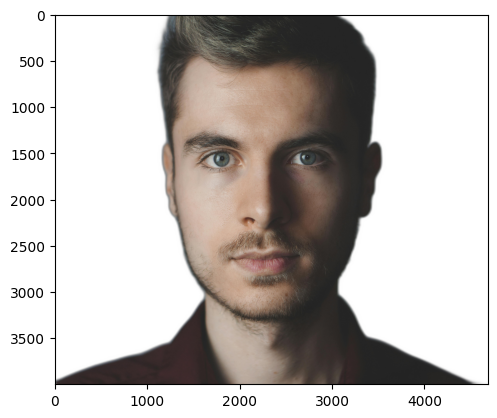

In [229]:
def convert_image_to_jpg(input_image_path, output_image_path):
    try:
        from PIL import Image
        from rembg import remove
        img = Image.open(input_image_path)
        
        img = remove(img)
        size = img.size
#         print(size)
        result = Image.new("RGB", size, 'white')
        result.paste(img, mask=img)
        rgb_img = result.convert('RGB')
        
        # Saving the image
        rgb_img.save(output_image_path)
        print(f'Conversion successful for {input_image_path}')
        
        # Plotting converted image
        import matplotlib.pyplot as plt
        print(f'Here is {output_image_path}:')
        plt.imshow(Image.open(output_image_path));
    except IOError:
        print(f'Unable to open {input_image_path}')

convert_image_to_jpg('/additional_drive1/Muhammad_Umer_Mansoor/random.jpg', 'test.jpg')

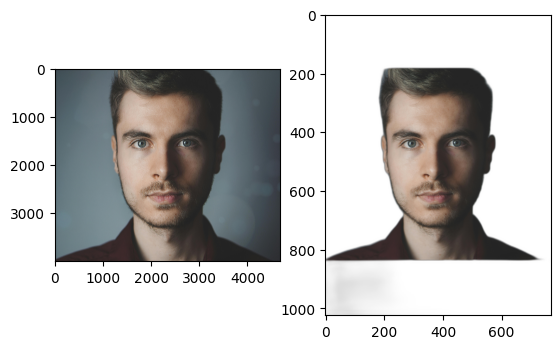

In [97]:
def convert_image_to_jpg(cv2_image):
    import cv2
    from PIL import Image
    from rembg import remove
    
    # Converting CV2 image to PIL image
    pil_image = Image.fromarray(cv2_image)
        
    # Target image size
    target_size = (768, 1024)
    
    # If image size is not 768x1024 then resizing the image
    if pil_image.size[0] != target_size[0] or pil_image.size[1] != target_size[1]:
        # Get the original width and height
        width, height = pil_image.size

        # Calculate the aspect ratio
        aspect_ratio = width / height

        # Calculate new dimensions based on the aspect ratio
        new_width = target_size[0]
        new_height = int(new_width / aspect_ratio)

        # If the calculated height is greater than the target height,
        # recalculate the width and height based on the target height
        if new_height > target_size[1]:
            new_height = target_size[1]
            new_width = int(new_height * aspect_ratio)

        # Resize the image
        resized_img = pil_image.resize((new_width, new_height), Image.LANCZOS)

        # Create a new blank image with the target dimensions
        final_img = Image.new("RGB", target_size, 'white')

        # Paste the resized image onto the blank image, centering it
        x_offset = (target_size[0] - new_width) // 2
        y_offset = (target_size[1] - new_height) // 2
        final_img.paste(resized_img, (x_offset, y_offset))
        resized_image = final_img
    else:
        # If image size is 768x1024 then no need to resize
        resized_image = pil_image

    # Removing background
    no_bg_img = remove(resized_image)
    
    # Creating new empty white image of 768x1024 size
    result = Image.new("RGB", target_size, 'white')
    
    # Pasting the image with background removed onto the new empty image
    result.paste(no_bg_img, mask=no_bg_img)
    
    # Returning PIL image object with background removed and 768x1024 size
    return result


# TESTING
import cv2
from PIL import Image

img = cv2.cvtColor(cv2.imread('/additional_drive1/Muhammad_Umer_Mansoor/random.jpg'), cv2.COLOR_BGR2RGB)

pill = convert_image_to_jpg(img)


import matplotlib.pyplot as plt
plt.subplots(1,2)

plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
plt.imshow(pill)

plt.show()

In the above code there is some issue because the background is not being removed properly. I've fixed this issue in the code below:

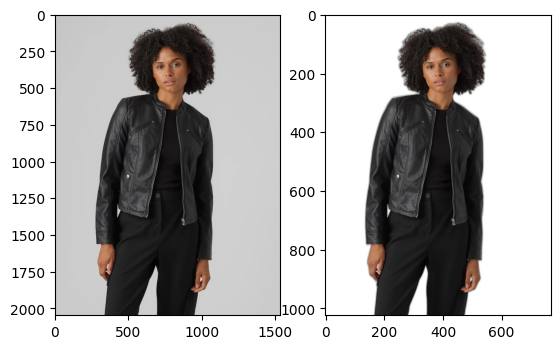

In [108]:
def convert_image_to_jpg(cv2_image):
    import cv2
    from PIL import Image
    from rembg import remove
    
    # Converting CV2 image to PIL image
    pil_image = Image.fromarray(cv2_image)
    
    # Removing background
    no_bg_img = remove(pil_image)
    
    # Target image size
    target_size = (768, 1024)
    
    
    # If image size is not 768x1024 then resizing the image
    if no_bg_img.size[0] != target_size[0] or no_bg_img.size[1] != target_size[1]:
        
        # Get the original width and height
        width, height = no_bg_img.size

        # Calculate the aspect ratio
        aspect_ratio = width / height

        # Calculate new dimensions based on the aspect ratio
        new_width = target_size[0]
        new_height = int(new_width / aspect_ratio)

        # If the calculated height is greater than the target height,
        # recalculate the width and height based on the target height
        if new_height > target_size[1]:
            new_height = target_size[1]
            new_width = int(new_height * aspect_ratio)

        # Resize the image
        resized_img = no_bg_img.resize((new_width, new_height), Image.LANCZOS)
        
        # Create a new blank image with the target dimensions
        final_img = Image.new("RGB", target_size, 'white')

        # Paste the resized image onto the blank image, centering it
        x_offset = (target_size[0] - new_width) // 2
        y_offset = (target_size[1] - new_height) // 2
        final_img.paste(resized_img, (x_offset, y_offset), mask=resized_img)

    else:

        # If image size is 768x1024 then no need to resize
        final_img = no_bg_img
    
    return final_img


# TESTING
import cv2
from PIL import Image

img = cv2.cvtColor(cv2.imread('/additional_drive1/Muhammad_Umer_Mansoor/new1.jpg'), cv2.COLOR_BGR2RGB)

pill = convert_image_to_jpg(img)


import matplotlib.pyplot as plt
plt.subplots(1,2)

plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
plt.imshow(pill)

plt.show()

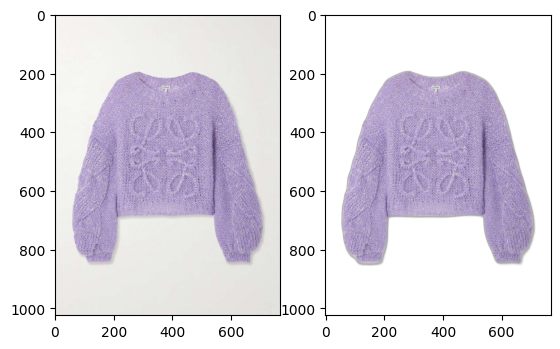

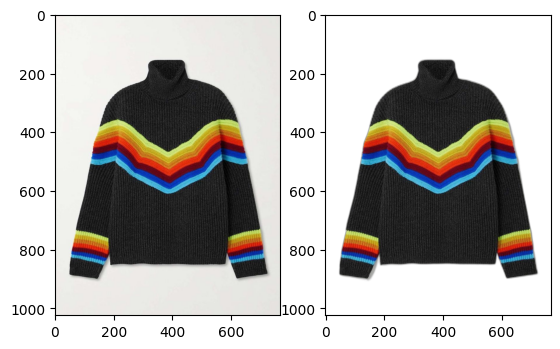

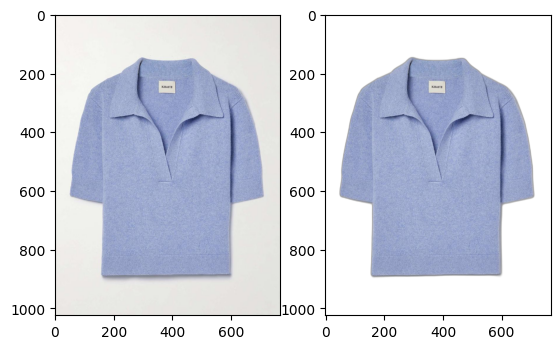

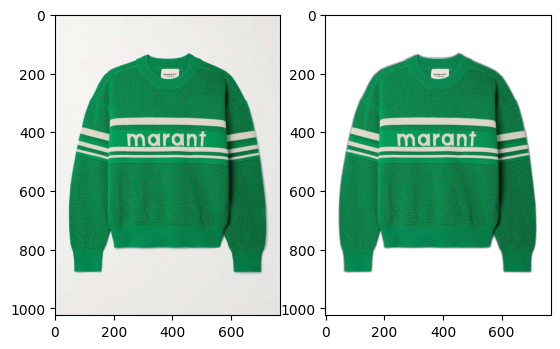

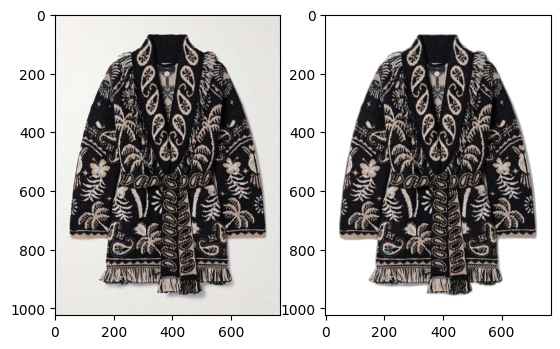

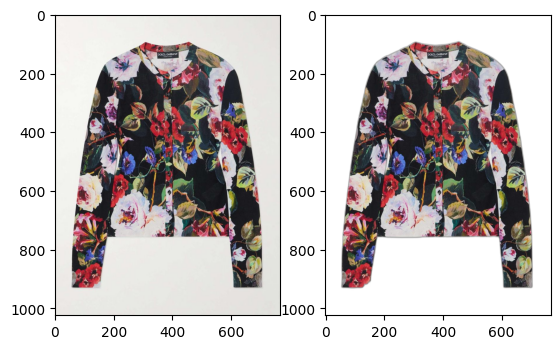

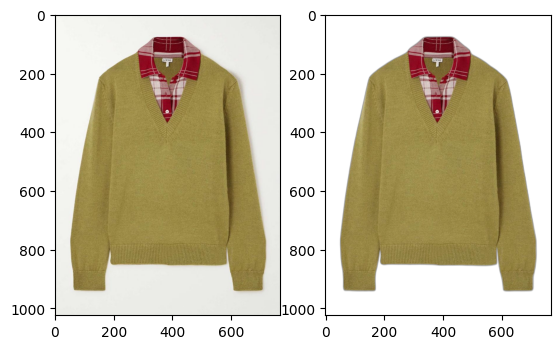

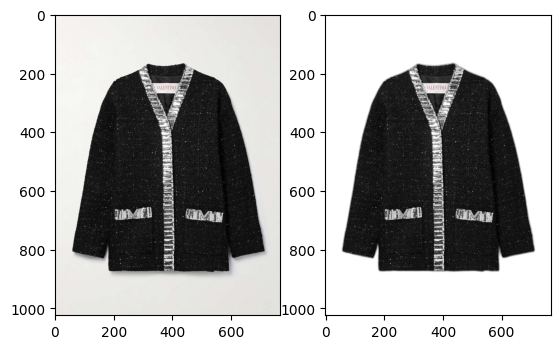

In [109]:
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt

testing_images = os.listdir('/additional_drive1/Muhammad_Umer_Mansoor/testing_images_for_bg_remove/')

for imag in testing_images:
    img = cv2.cvtColor(cv2.imread(os.path.join('/additional_drive1/Muhammad_Umer_Mansoor/testing_images_for_bg_remove/', imag)), cv2.COLOR_BGR2RGB)

    pill = convert_image_to_jpg(img)

    plt.subplots(1,2)

    plt.subplot(121)
    plt.imshow(img)

    plt.subplot(122)
    plt.imshow(pill)

    plt.show()

## Resizing Image To 768x1024

Here is resized_image.jpg:


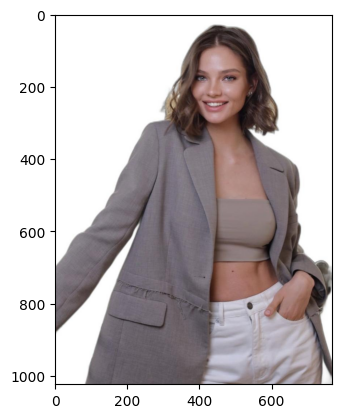

In [22]:
def resize_image(input_image_path, output_image_path, target_width=768, target_height=1024):
    # Open the image
    from PIL import Image
    img = Image.open(input_image_path)
    
    # Get the original width and height
    width, height = img.size
    
    # Calculate the aspect ratio
    aspect_ratio = width / height
    
    # Calculate new dimensions based on the aspect ratio
    new_width = target_width
    new_height = int(new_width / aspect_ratio)
    
    # If the calculated height is greater than the target height,
    # recalculate the width and height based on the target height
    if new_height > target_height:
        new_height = target_height
        new_width = int(new_height * aspect_ratio)
    
    # Resize the image
    resized_img = img.resize((new_width, new_height), Image.LANCZOS)
    
    # Create a new blank image with the target dimensions
    final_img = Image.new("RGB", (target_width, target_height), (255, 255, 255))
    
    # Paste the resized image onto the blank image, centering it
    x_offset = (target_width - new_width) // 2
    y_offset = (target_height - new_height) // 2
    final_img.paste(resized_img, (x_offset, y_offset))
    
    # Saving the image
    final_img.save(output_image_path)
    
    # Plotting image
    import matplotlib.pyplot as plt
    print(f'Here is {output_image_path}:')
    plt.imshow(Image.open(output_image_path));

resize_image("temp.jpg", "resized_image.jpg")

## Human Parse

In [3]:
pip install -r CIHP_PGN/requirement.txt

  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.29.1-py3-none-any.whl (895 kB)
  Using cached gast-0.2.2-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.42.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.0 MB)
  Using cached h5py-3.6.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (4.1 MB)
  Using cached importlib_metadata-4.8.2-py3-none-any.whl (17 kB)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached kiwisolver-1.3.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.1 MB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Us

In [13]:
!unzip CIHP_pgn.zip

Archive:  CIHP_pgn.zip
   creating: CIHP_pgn/
  inflating: CIHP_pgn/checkpoint     
  inflating: CIHP_pgn/model.ckpt-593292.data-00000-of-00001  
  inflating: CIHP_pgn/model.ckpt-593292.index  
  inflating: CIHP_pgn/model.ckpt-593292.meta  


In [2]:
import sys  # Import the sys module to access system-specific parameters and functions

# Print the Python version to the console
print("Python version")

# Use the sys.version attribute to get the Python version and print it
print(sys.version)

# Print information about the Python version
print("Version info.")

# Use the sys.version_info attribute to get detailed version information and print it
print(sys.version_info)

sys.exec_prefix

Python version
3.8.0 (default, Nov  6 2019, 21:49:08) 
[GCC 7.3.0]
Version info.
sys.version_info(major=3, minor=8, micro=0, releaselevel='final', serial=0)


'/var/anaconda3/envs/umer'

In [1]:
# !fuser -ka /dev/nvidia0
!nvidia-smi

Thu Mar 28 11:42:35 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 42%   50C    P0    37W / 180W |      0MiB /  8192MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [55]:
from ultralytics import SAM
import os
# Load a model
model = SAM('sam_l.pt')
# model.

# Run inference
image_path = '/additional_drive1/Muhammad_Umer_Mansoor/CIHP_PGN/datasets/images/testing23.png'
print("here I am")
pred_ = model(image_path, device='cpu')

here I am

image 1/1 /additional_drive1/Muhammad_Umer_Mansoor/CIHP_PGN/datasets/images/testing23.png: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 29, 1 30, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 39, 1 40, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 1 49, 1 50, 1 51, 1 52, 1 53, 1 54, 1 55, 1 56, 1 57, 1 58, 1 59, 1 60, 1 61, 1 62, 1 63, 1 64, 1 65, 1 66, 1 67, 1 68, 1 69, 1 70, 1 71, 274992.0ms
Speed: 5.7ms preprocess, 274992.0ms inference, 135.3ms postprocess per image at shape (1, 3, 1024, 1024)


In [201]:
# ultra_masks = pred_[0].masks
ultra_masks = pred_[0].plot()

In [212]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_segmentations(masks):
    # Ensure masks have the correct shape (num_masks, height, width)
#     assert masks.ndim == 3, "Masks should be a 3D tensor (num_masks, height, width)"

    # Calculate mask areas (sum of pixel values along height and width)
    mask_areas = np.sum(masks, axis=(1, 2))

    # Sort masks by area (largest first)
    sorted_indices = np.argsort(mask_areas)[::-1]
    sorted_masks = masks[sorted_indices]

    # Create an image with colored masks
    img = np.ones((masks.shape[1], masks.shape[2], 3))
    for i, mask in enumerate(sorted_masks):
        color_mask = np.random.random((1, 3)).tolist()
        img[:, :, :] = color_mask
        img[:, :, :] = np.dstack((img, mask))

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Assuming you have 'ultra_masks' loaded from the model output
visualize_segmentations(ultra_masks)


ValueError: could not broadcast input array from shape (768,3,4) into shape (768,3,3)

In [150]:
detections = sv.Detections.from_sam(model)

box_annotator = sv.BoxAnnotator()
labels = [
	f"{classes[class_id]} {confidence:0.2f}"
	for _, _, confidence, class_id, _
	in detections
]

TypeError: 'SAM' object is not iterable

In [53]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [1.]]) 
        img[m] = color_mask
    ax.imshow(img)
    plt.imsave("sammm.jpg", img)

In [8]:
import sys
sys.path.append("..")
from PIL import Image
from rembg import remove
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [145]:
image_path = '/additional_drive1/Muhammad_Umer_Mansoor/CIHP_PGN/datasets/images/img1.png'
img = Image.open(image_path)
img = remove(img)
size = img.size
result = Image.new("RGB", size, 'white')
result.paste(img, mask=img)
result.save("temp.jpg")
image = cv2.imread('temp.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# masks = mask_generator.generate(image)

In [10]:
print(len(masks))
print(masks[0].keys())

18
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


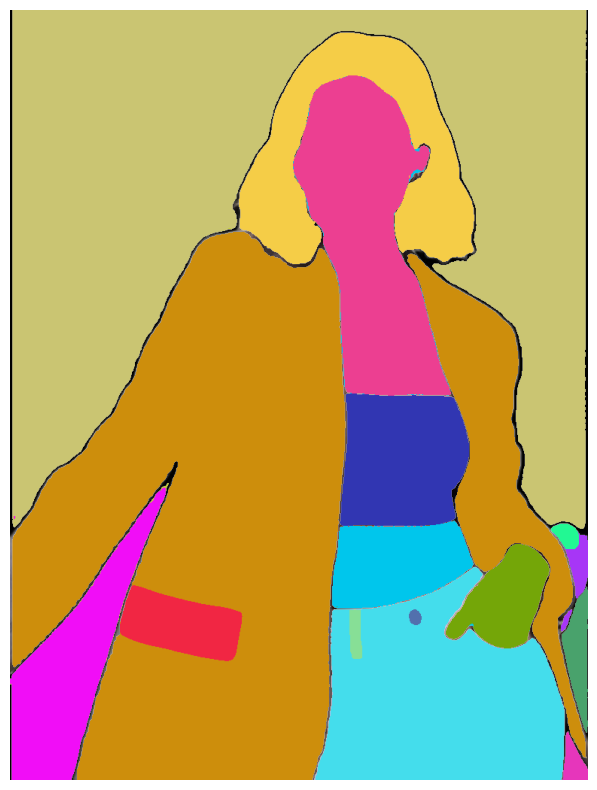

In [92]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()
# plt.imsave('sam.jpg', plt.im)

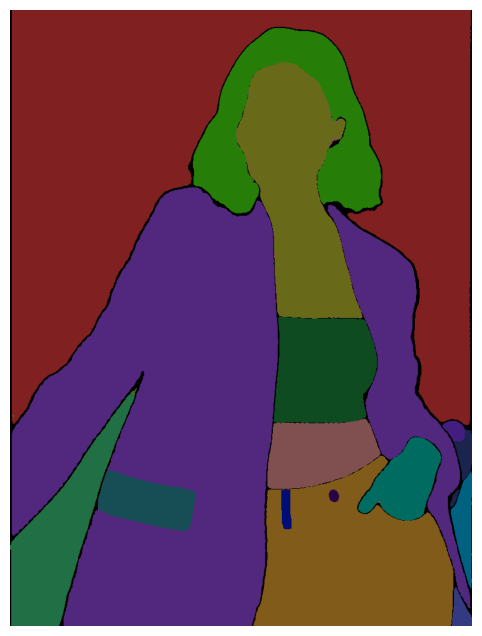

In [147]:
# import supervision as sv

# mask_annotator = sv.MaskAnnotator(color_lookup = sv.ColorLookup.INDEX)
# detections = sv.Detections.from_sam(masks)
# annotated_image = mask_annotator.annotate(image, detections)
# sv.plot_image(annotated_image, (8,8))

import supervision as sv
import numpy as np

# Assuming your original image size is known (replace these values accordingly)
image_height = 1024
image_width = 768

# Create a black image of the same size as the original image
black_image = np.zeros((1024, 768, 3), dtype=np.uint8)

mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)
detections = sv.Detections.from_sam(masks)
annotated_image = mask_annotator.annotate(black_image, detections)
sv.plot_image(annotated_image, (8, 8))


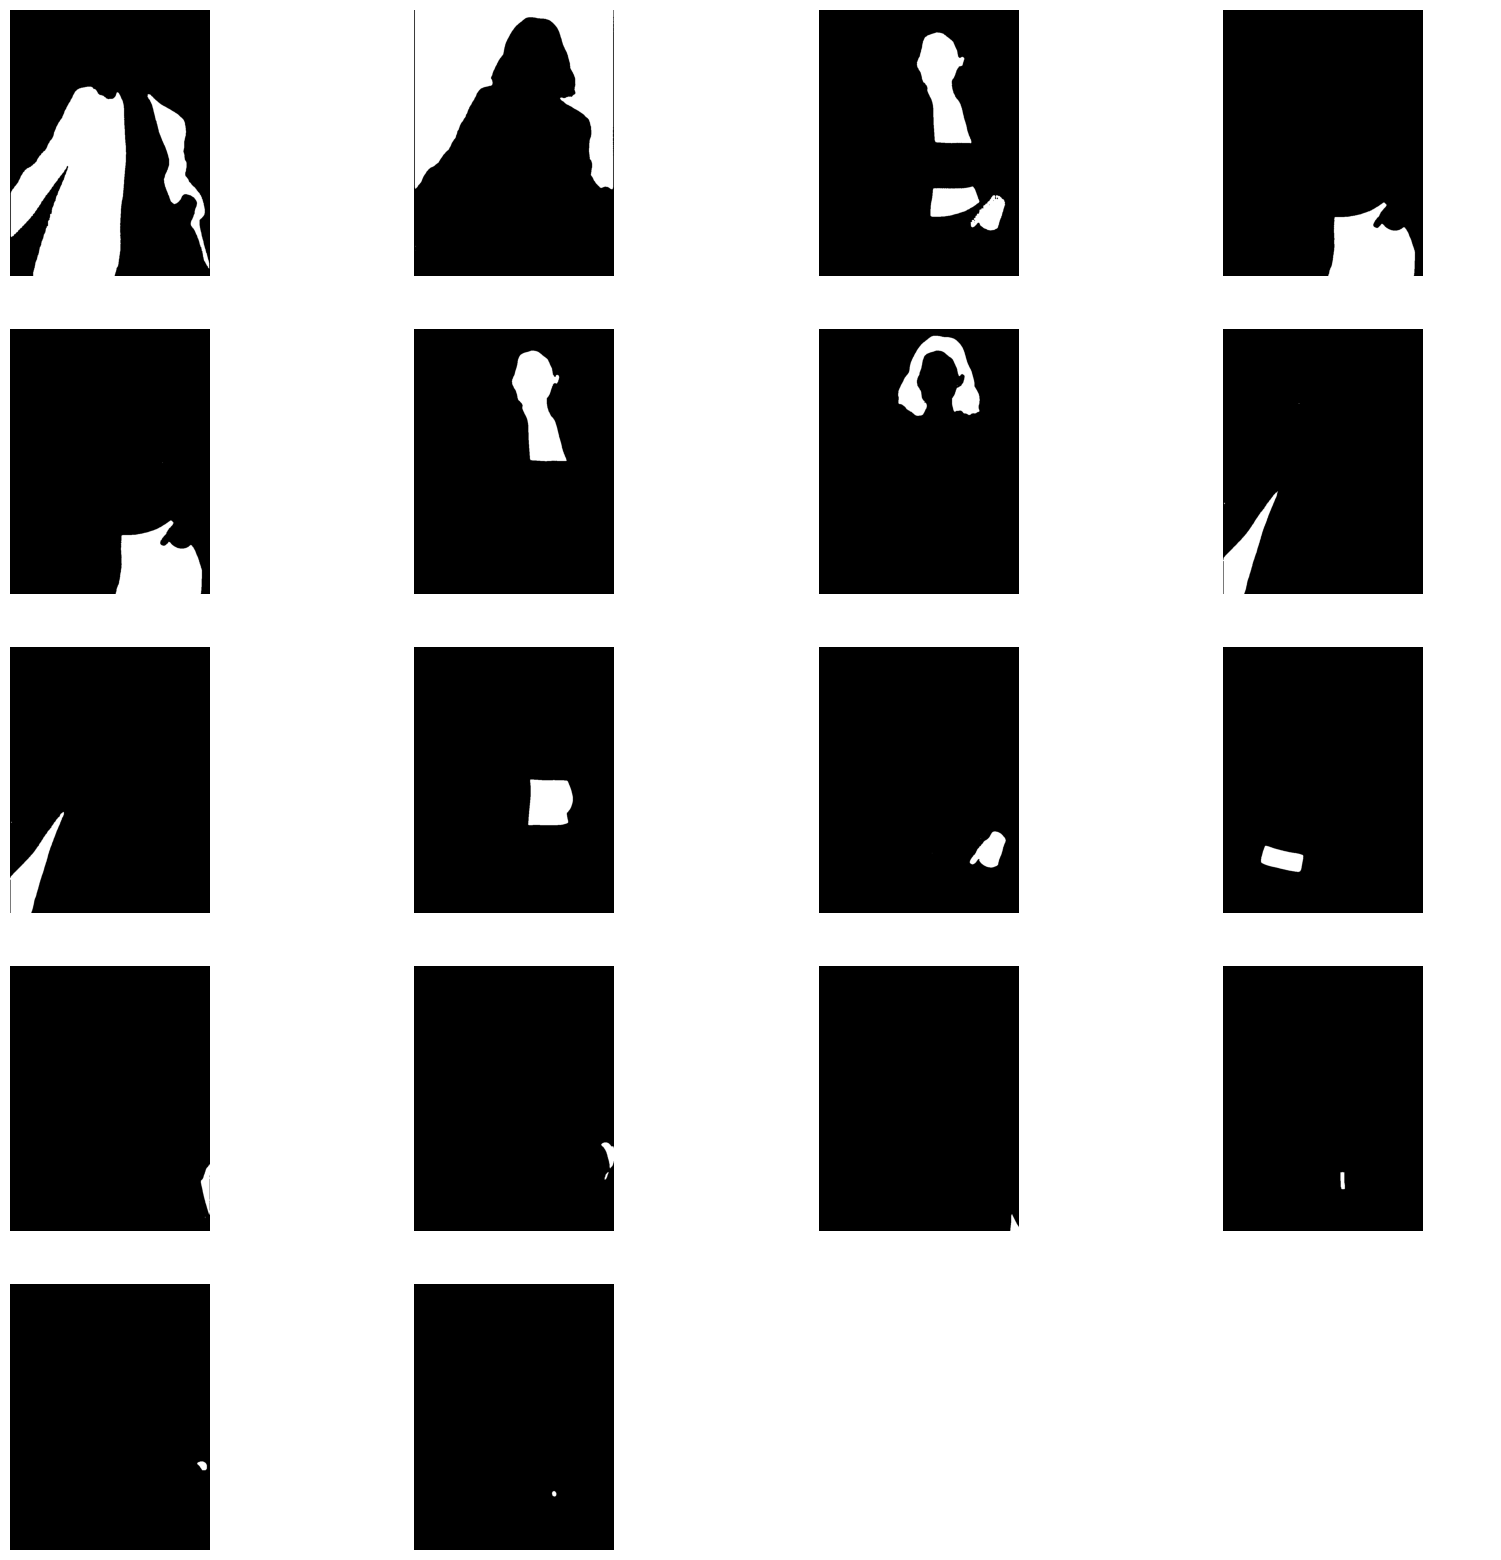

In [84]:
masks_ = [
    mask['segmentation']
    for mask
    in sorted(masks, key=lambda x: x['area'], reverse=True)
]

sv.plot_images_grid(
    images=masks_,
    grid_size=(5, int(len(masks) / 4)),
    size=(20, 20)
)

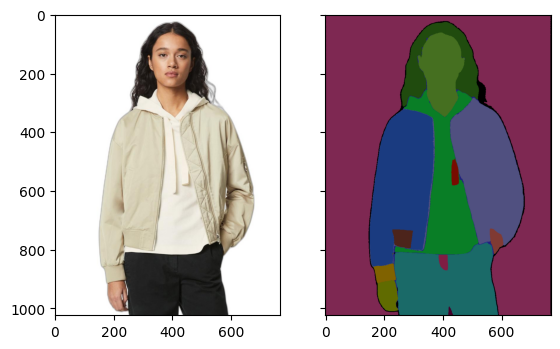

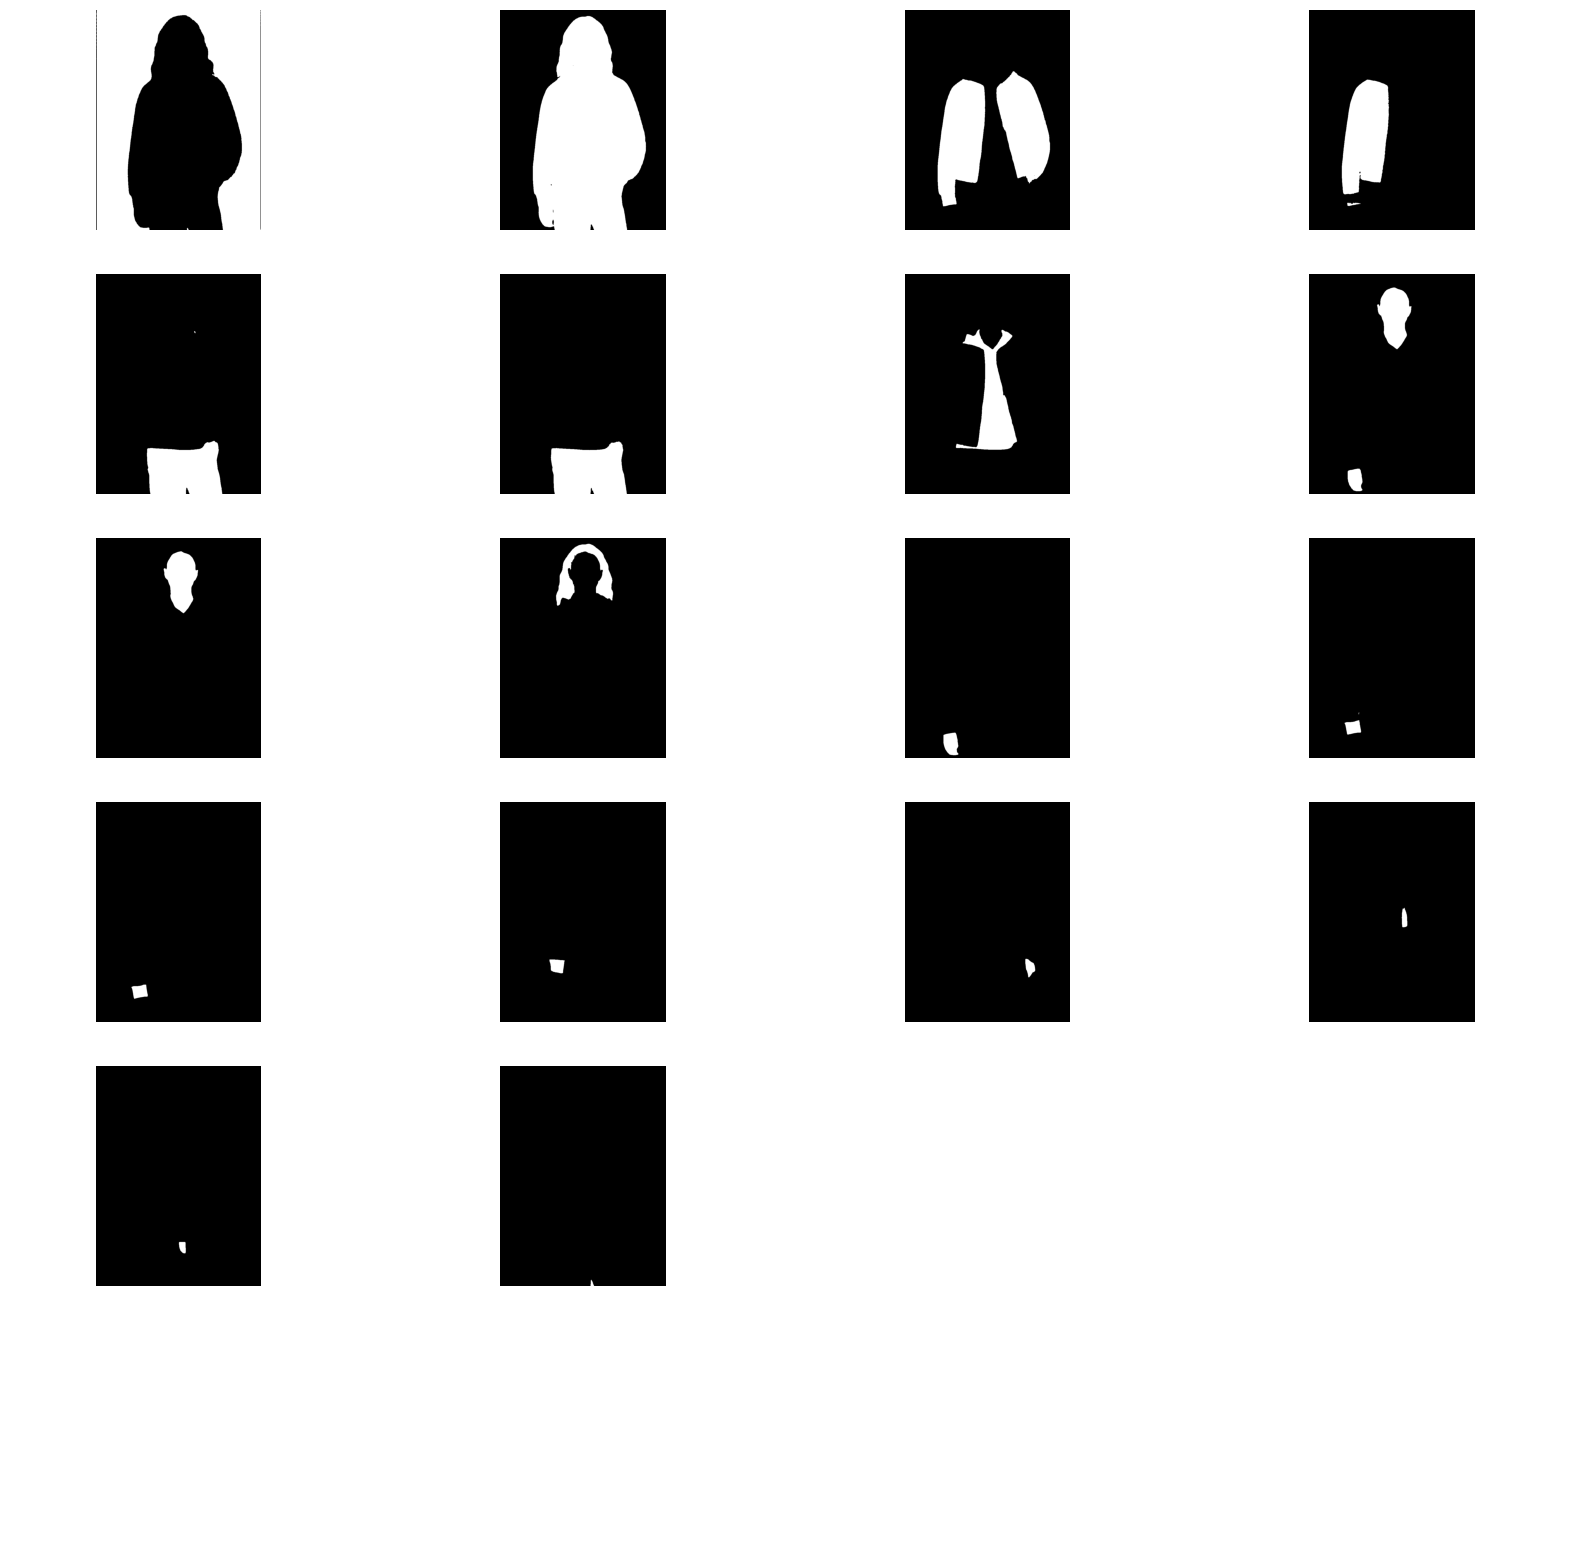

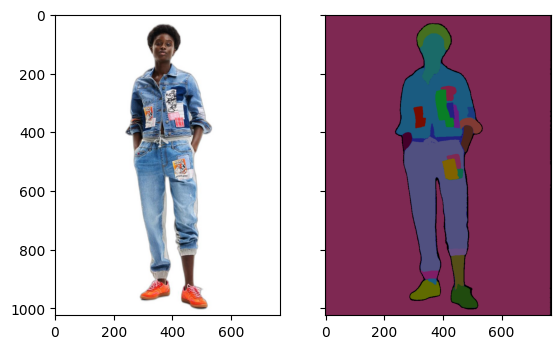

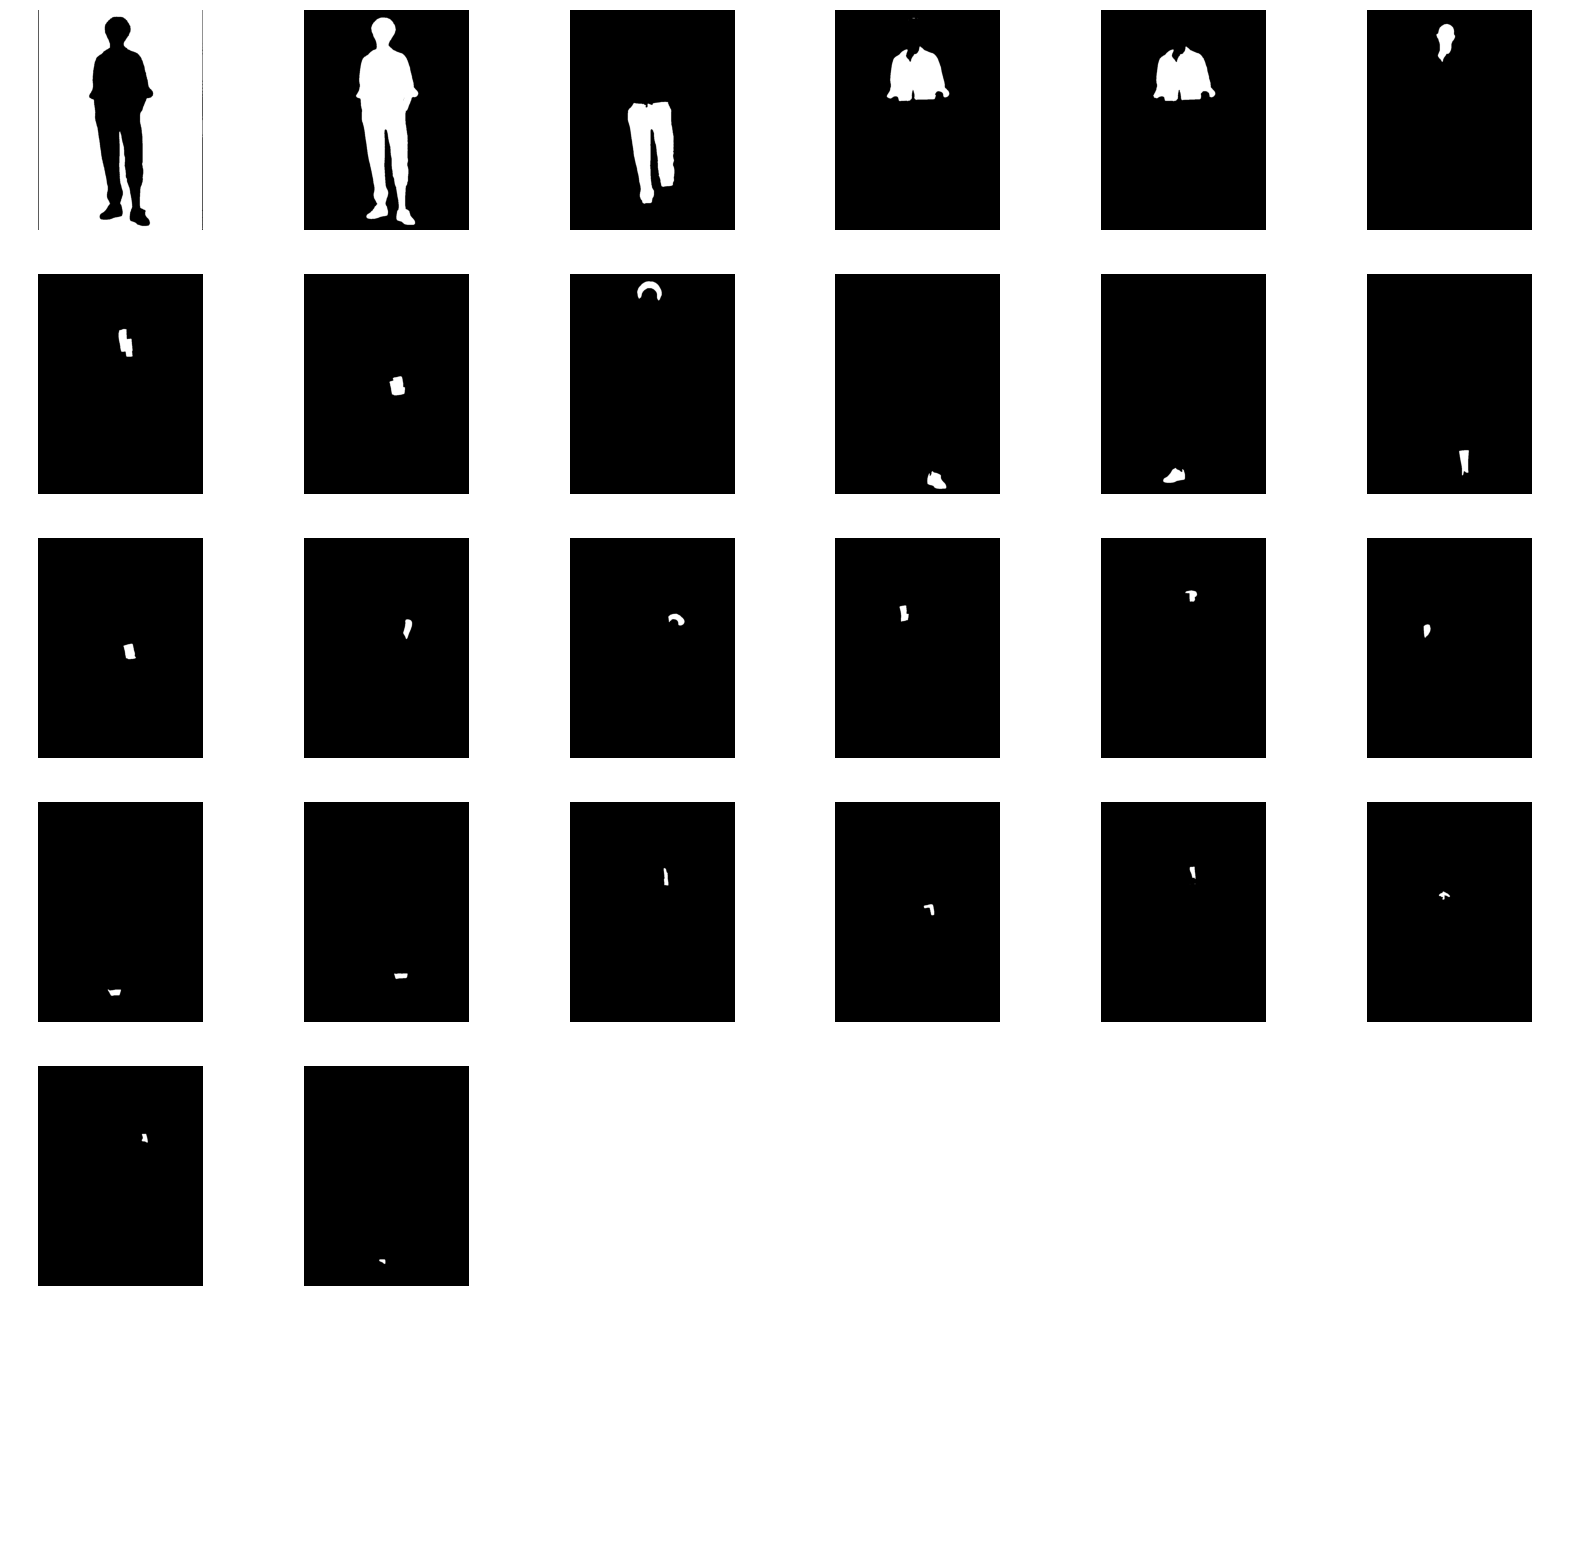

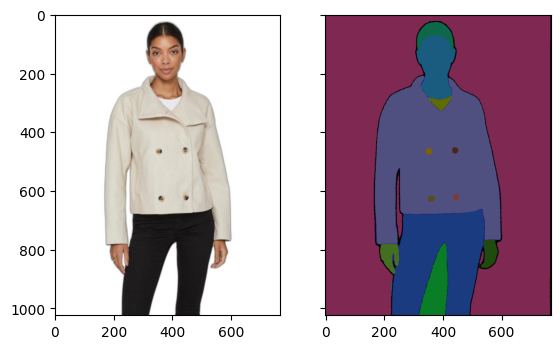

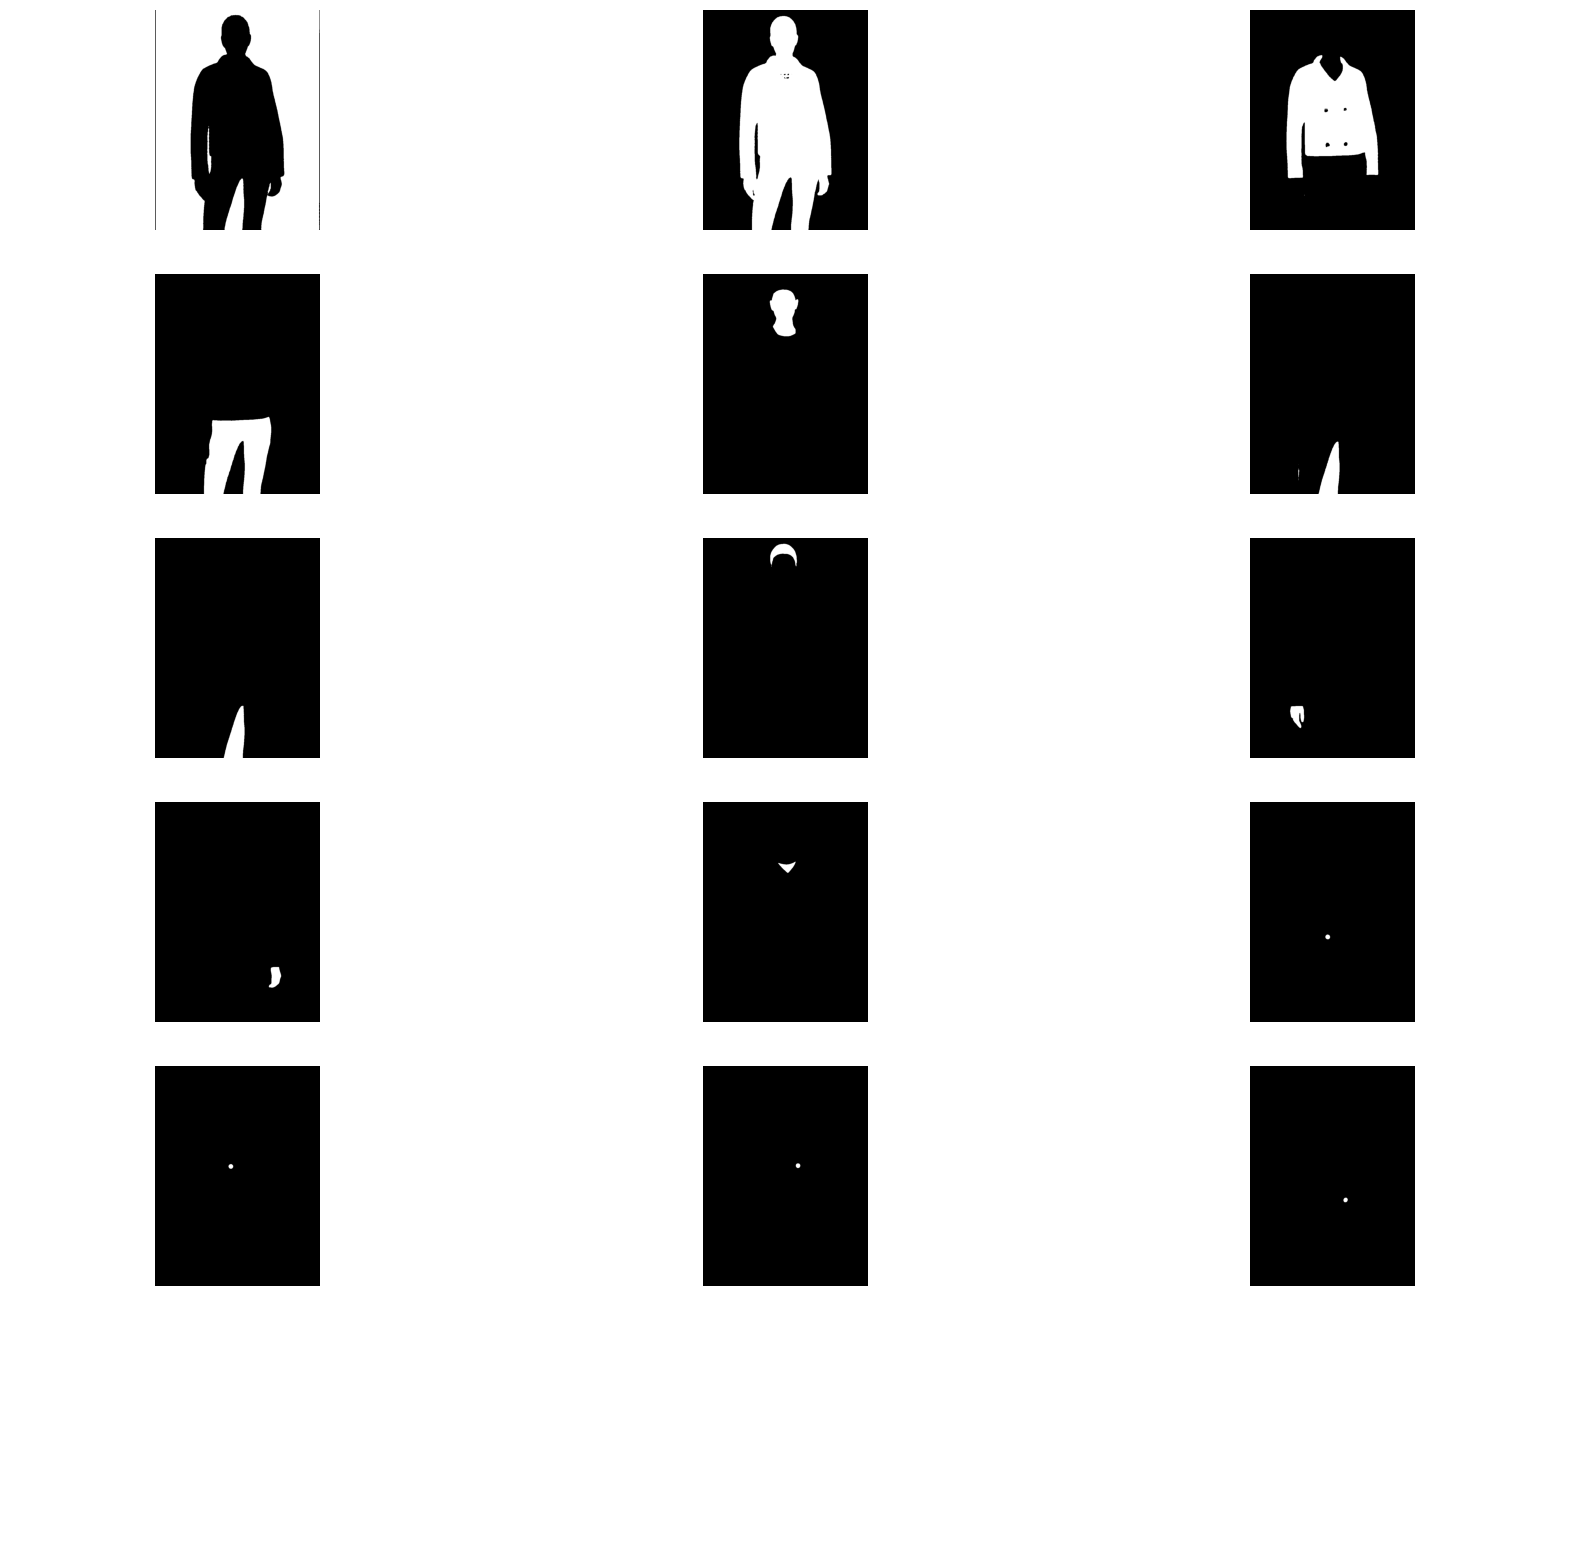

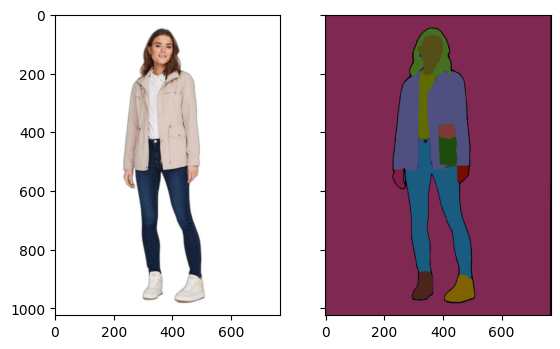

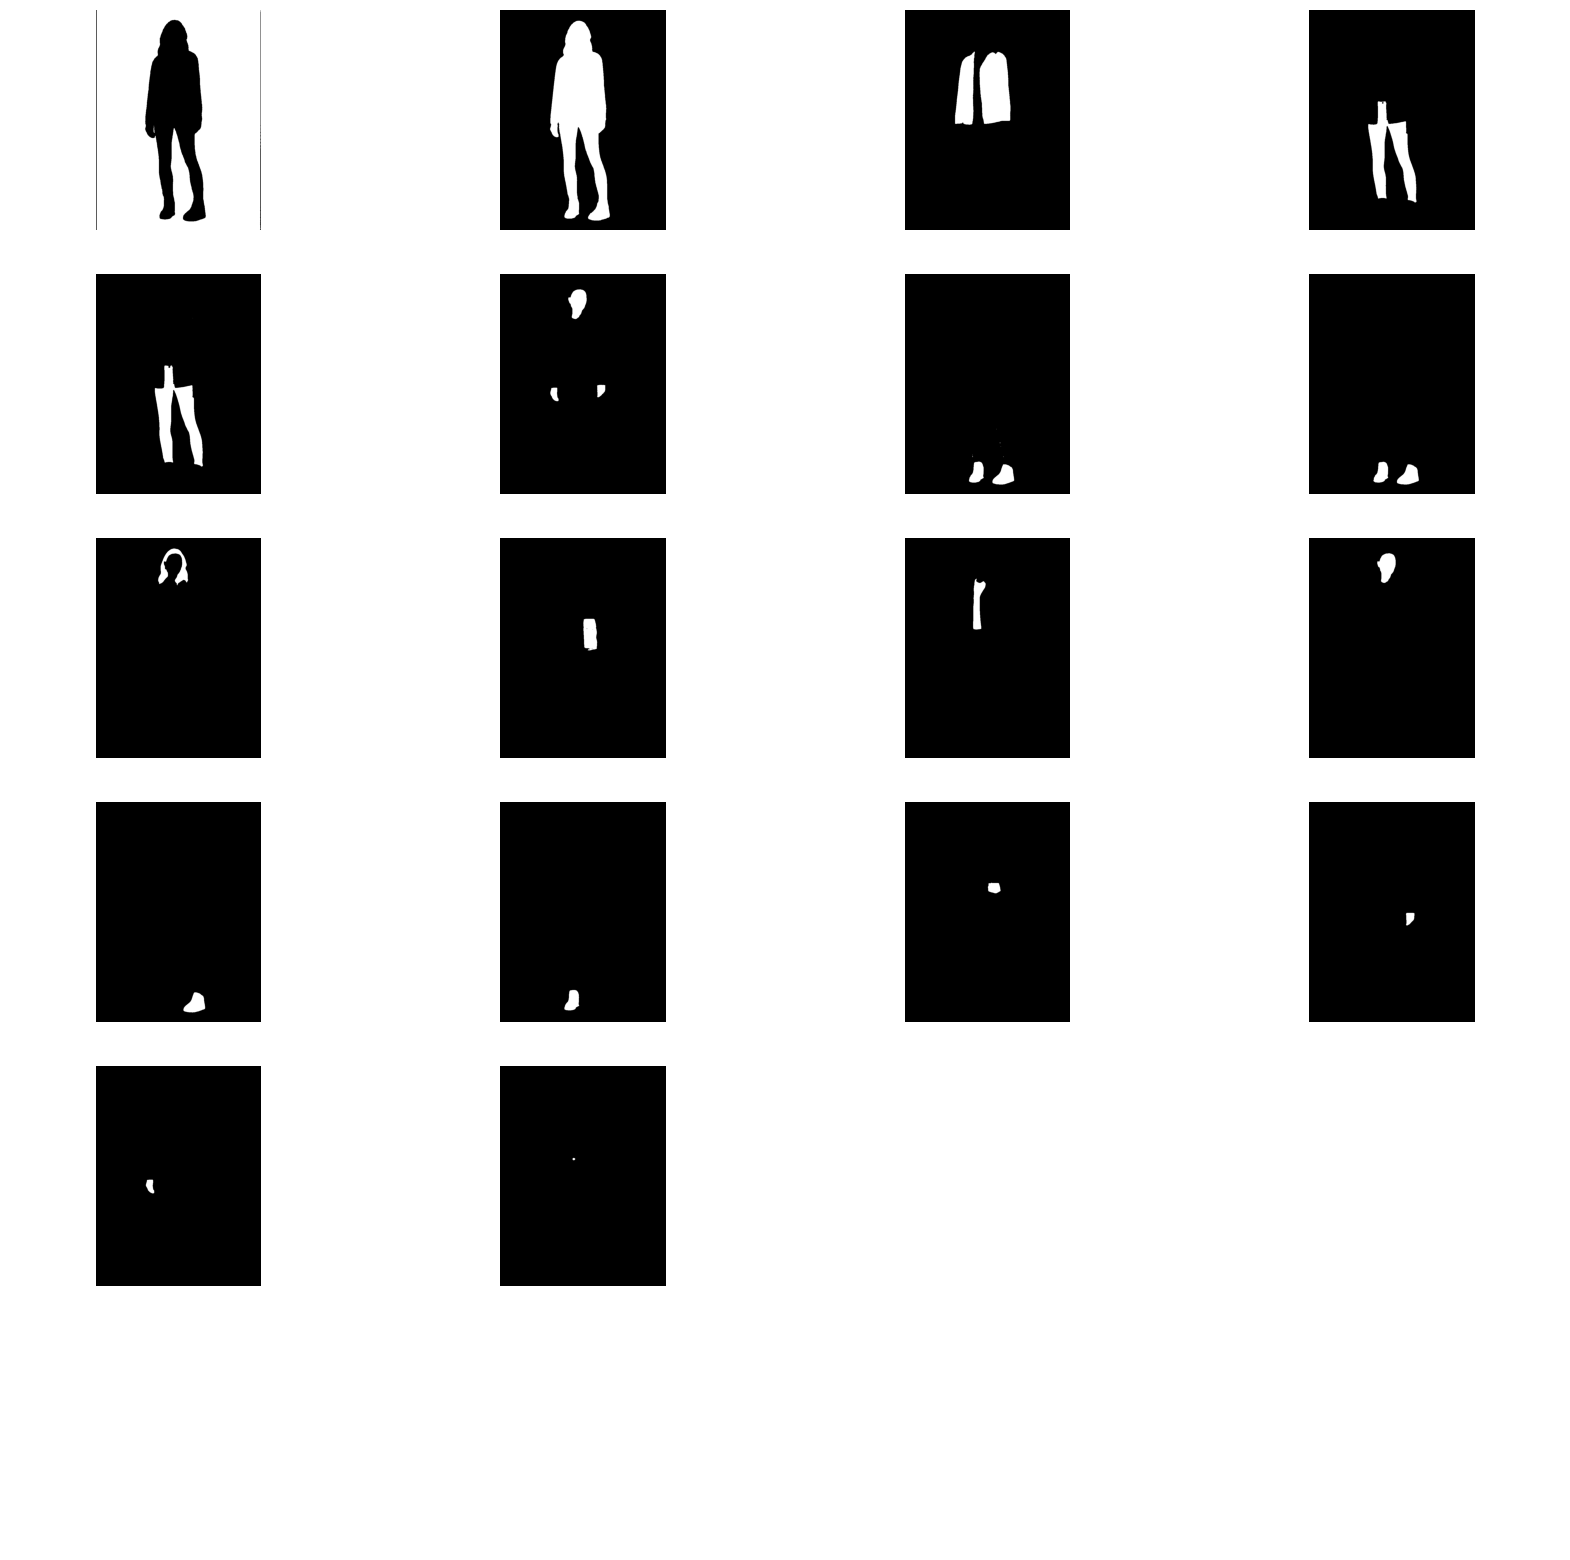

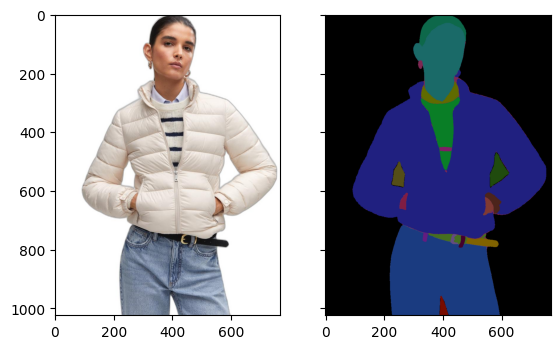

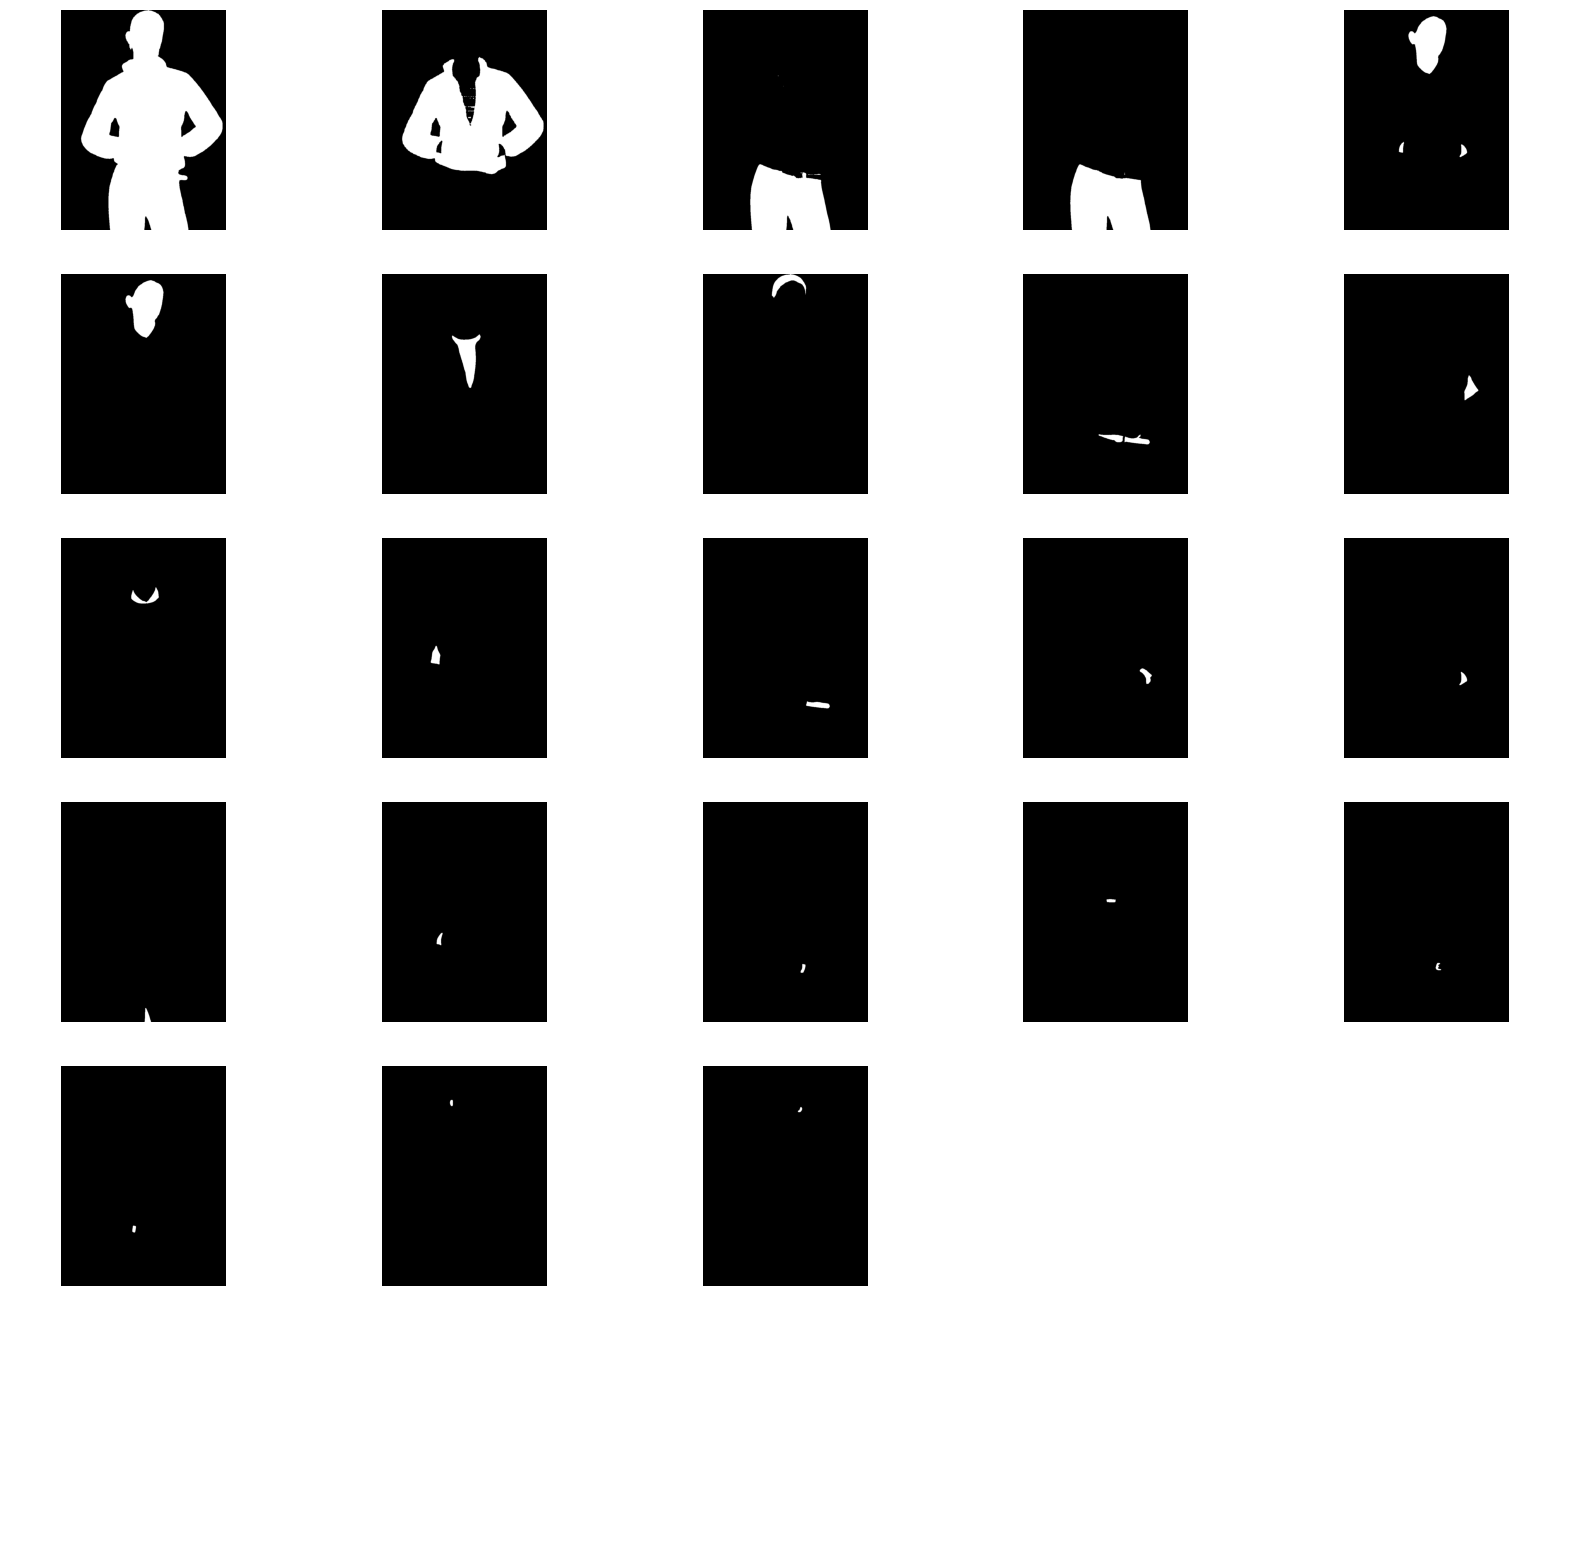

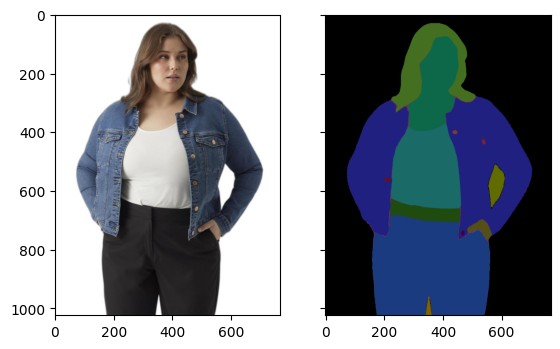

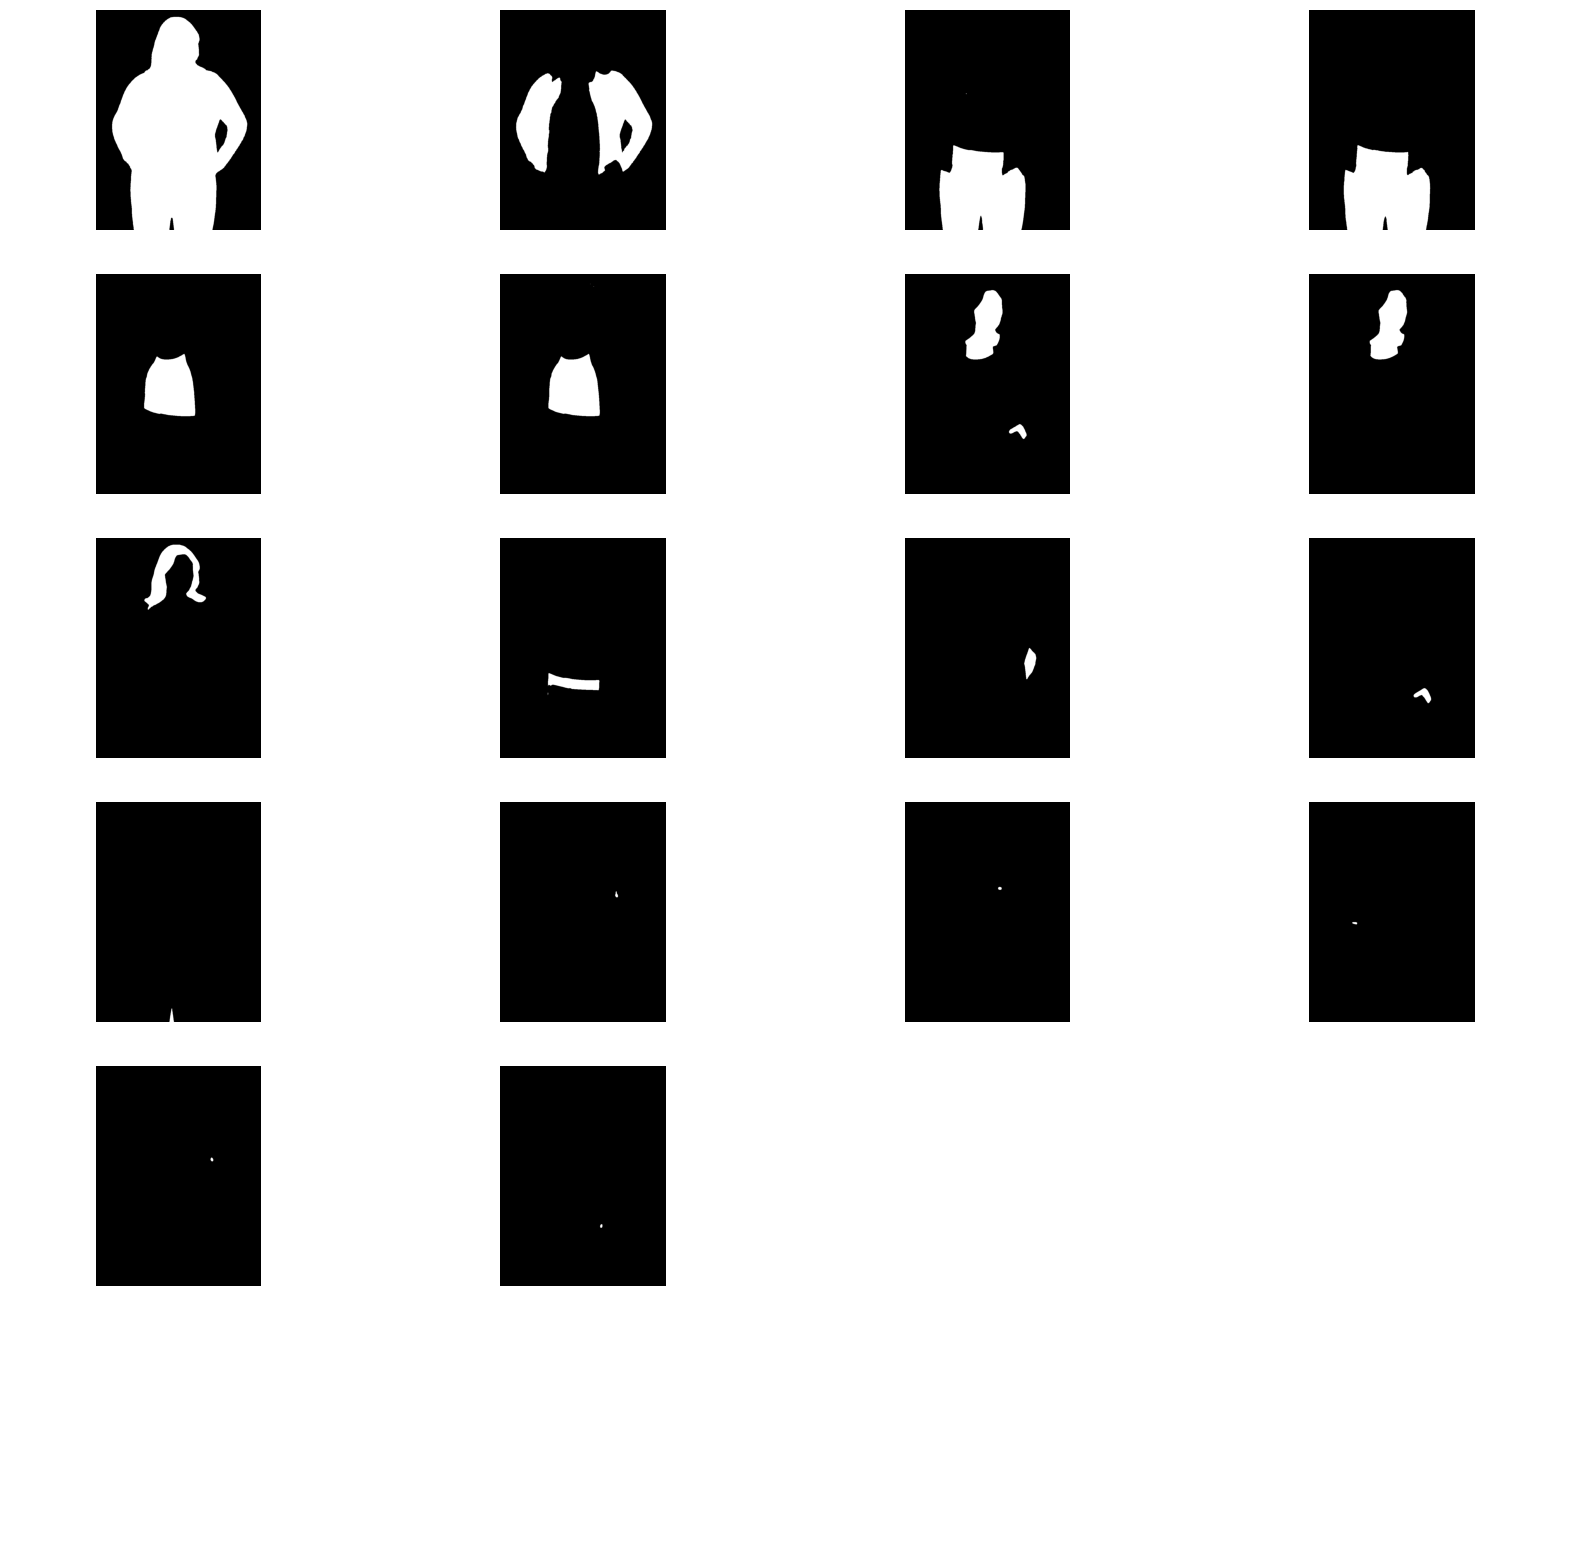

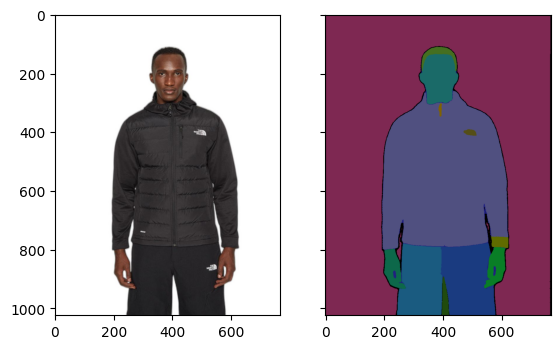

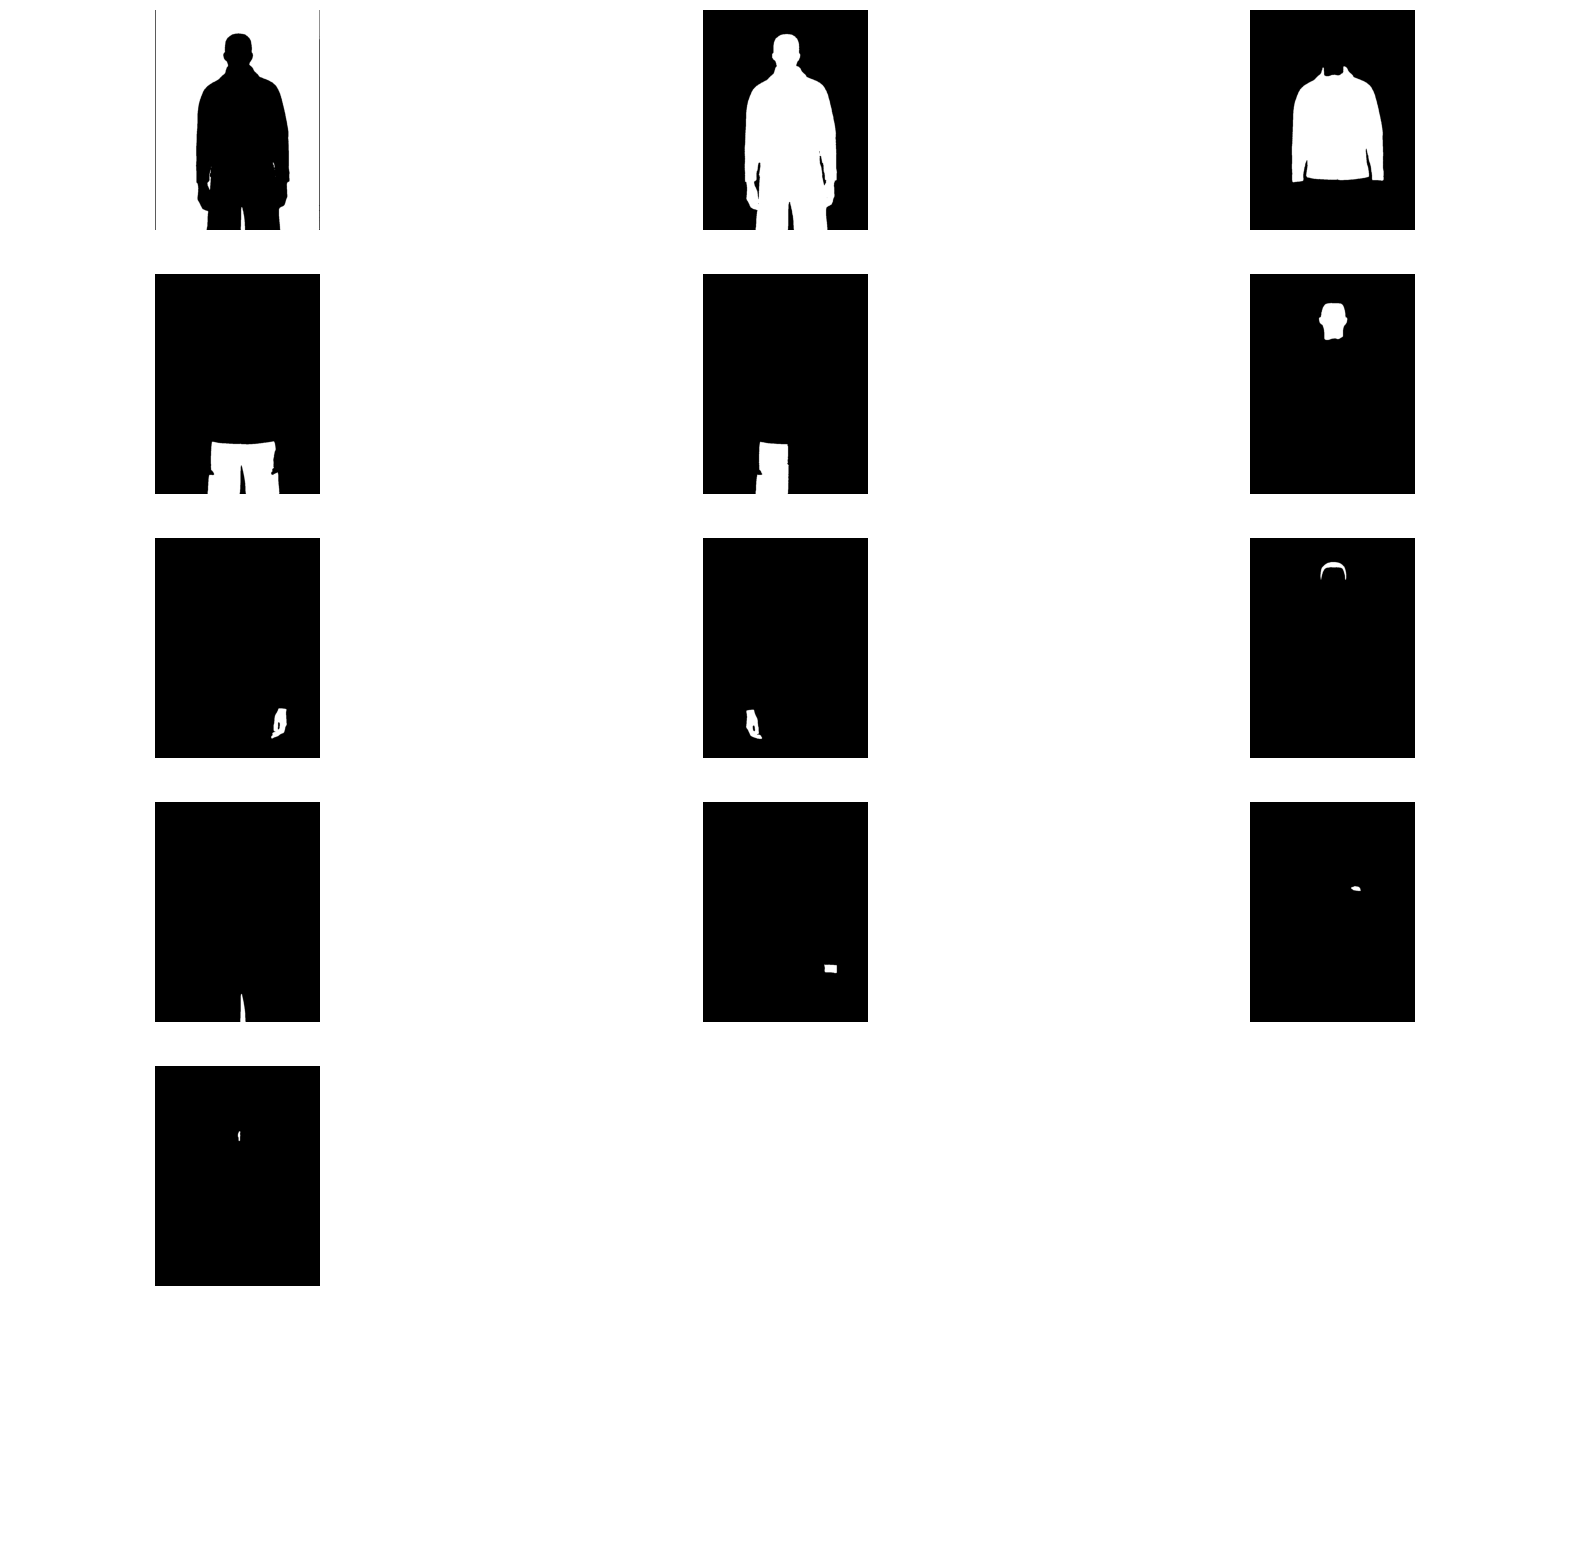

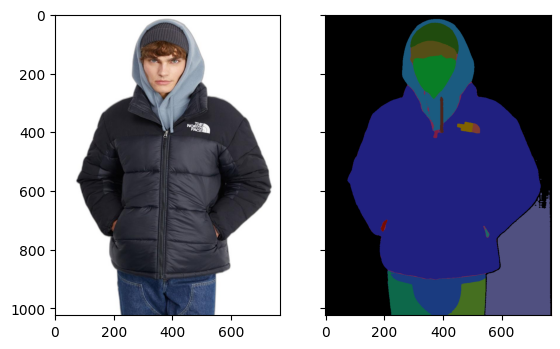

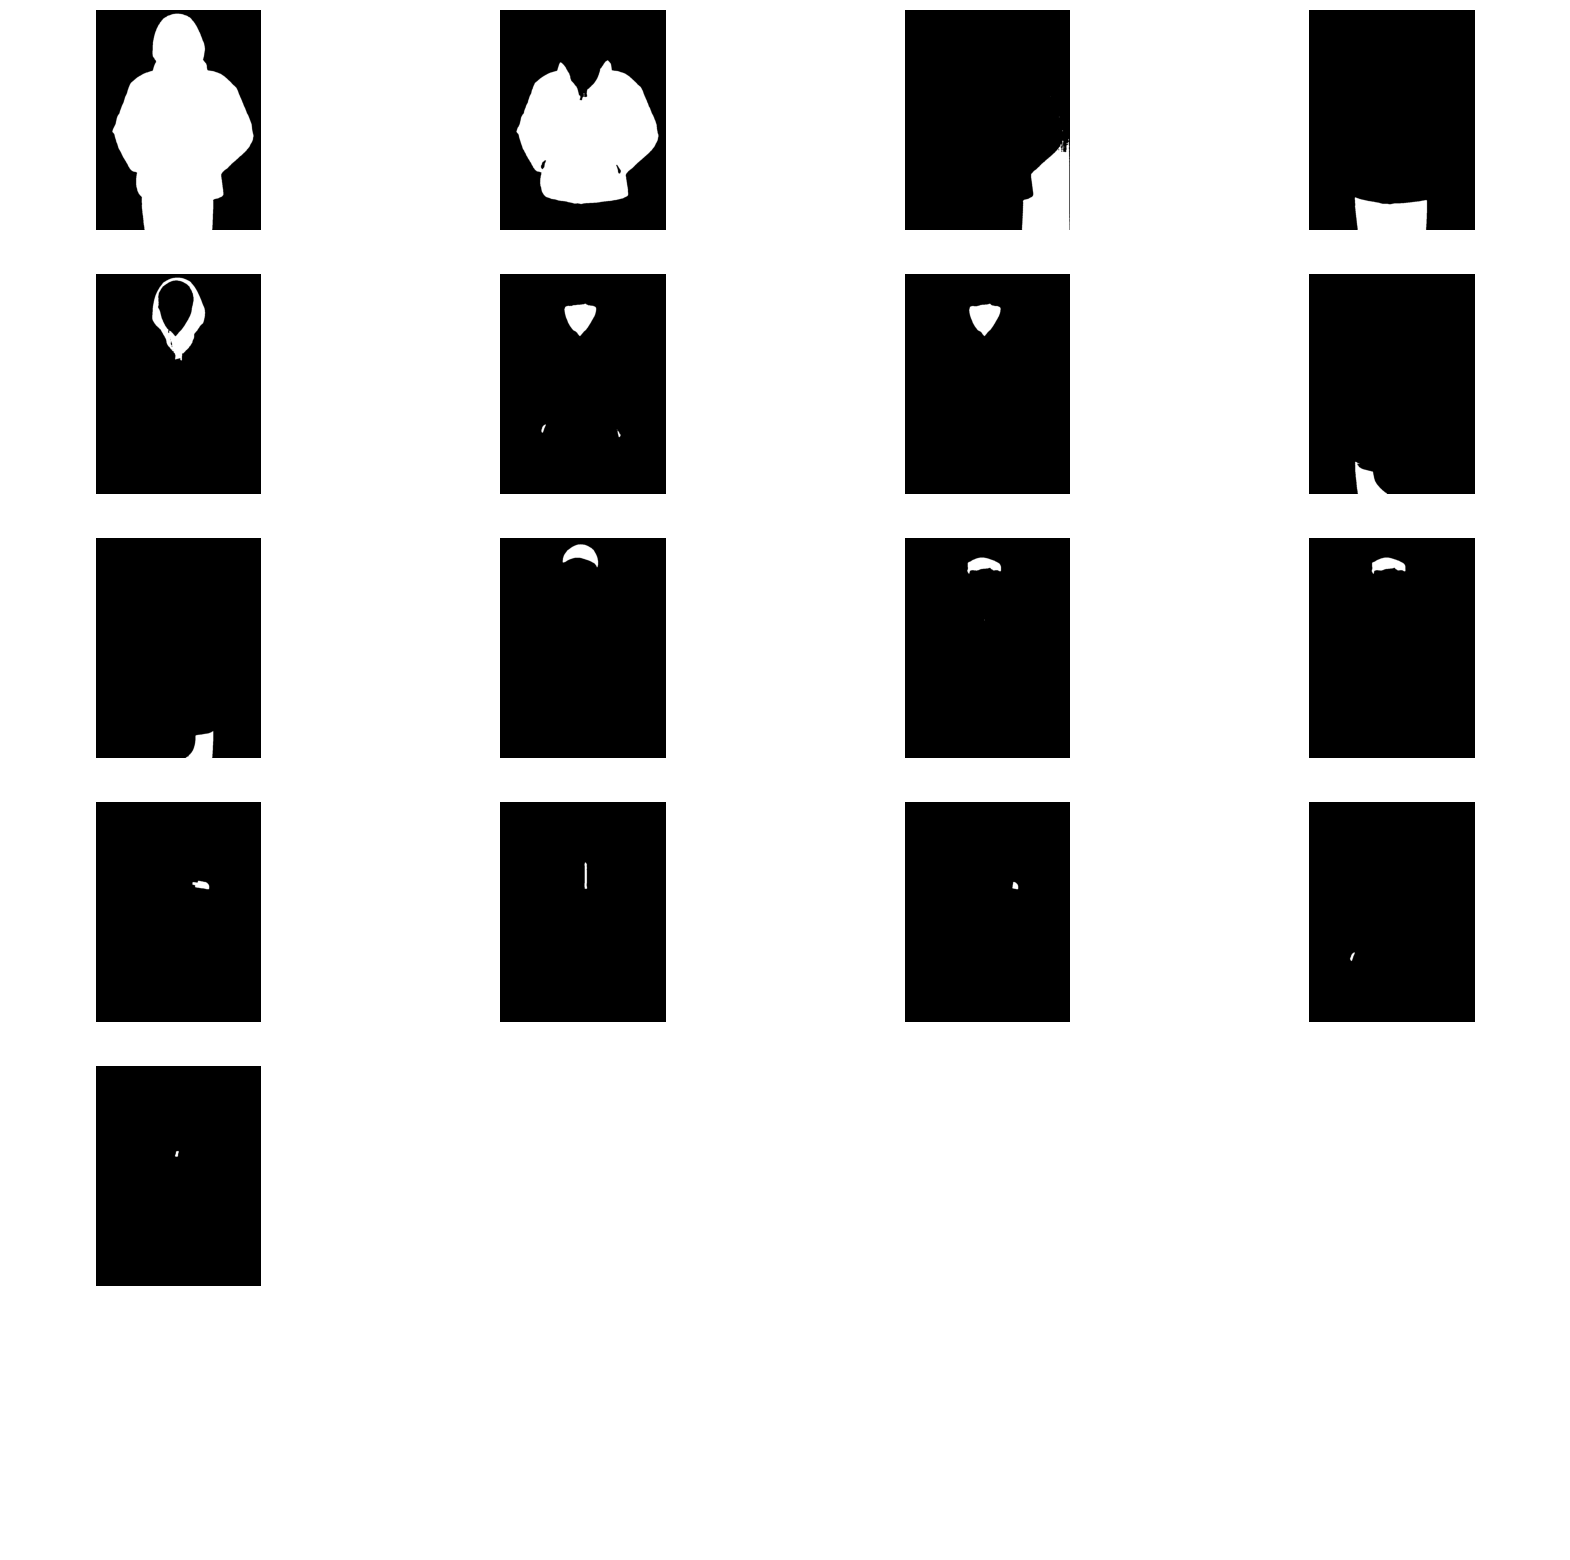

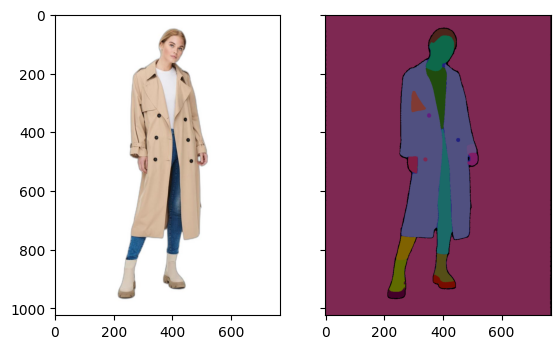

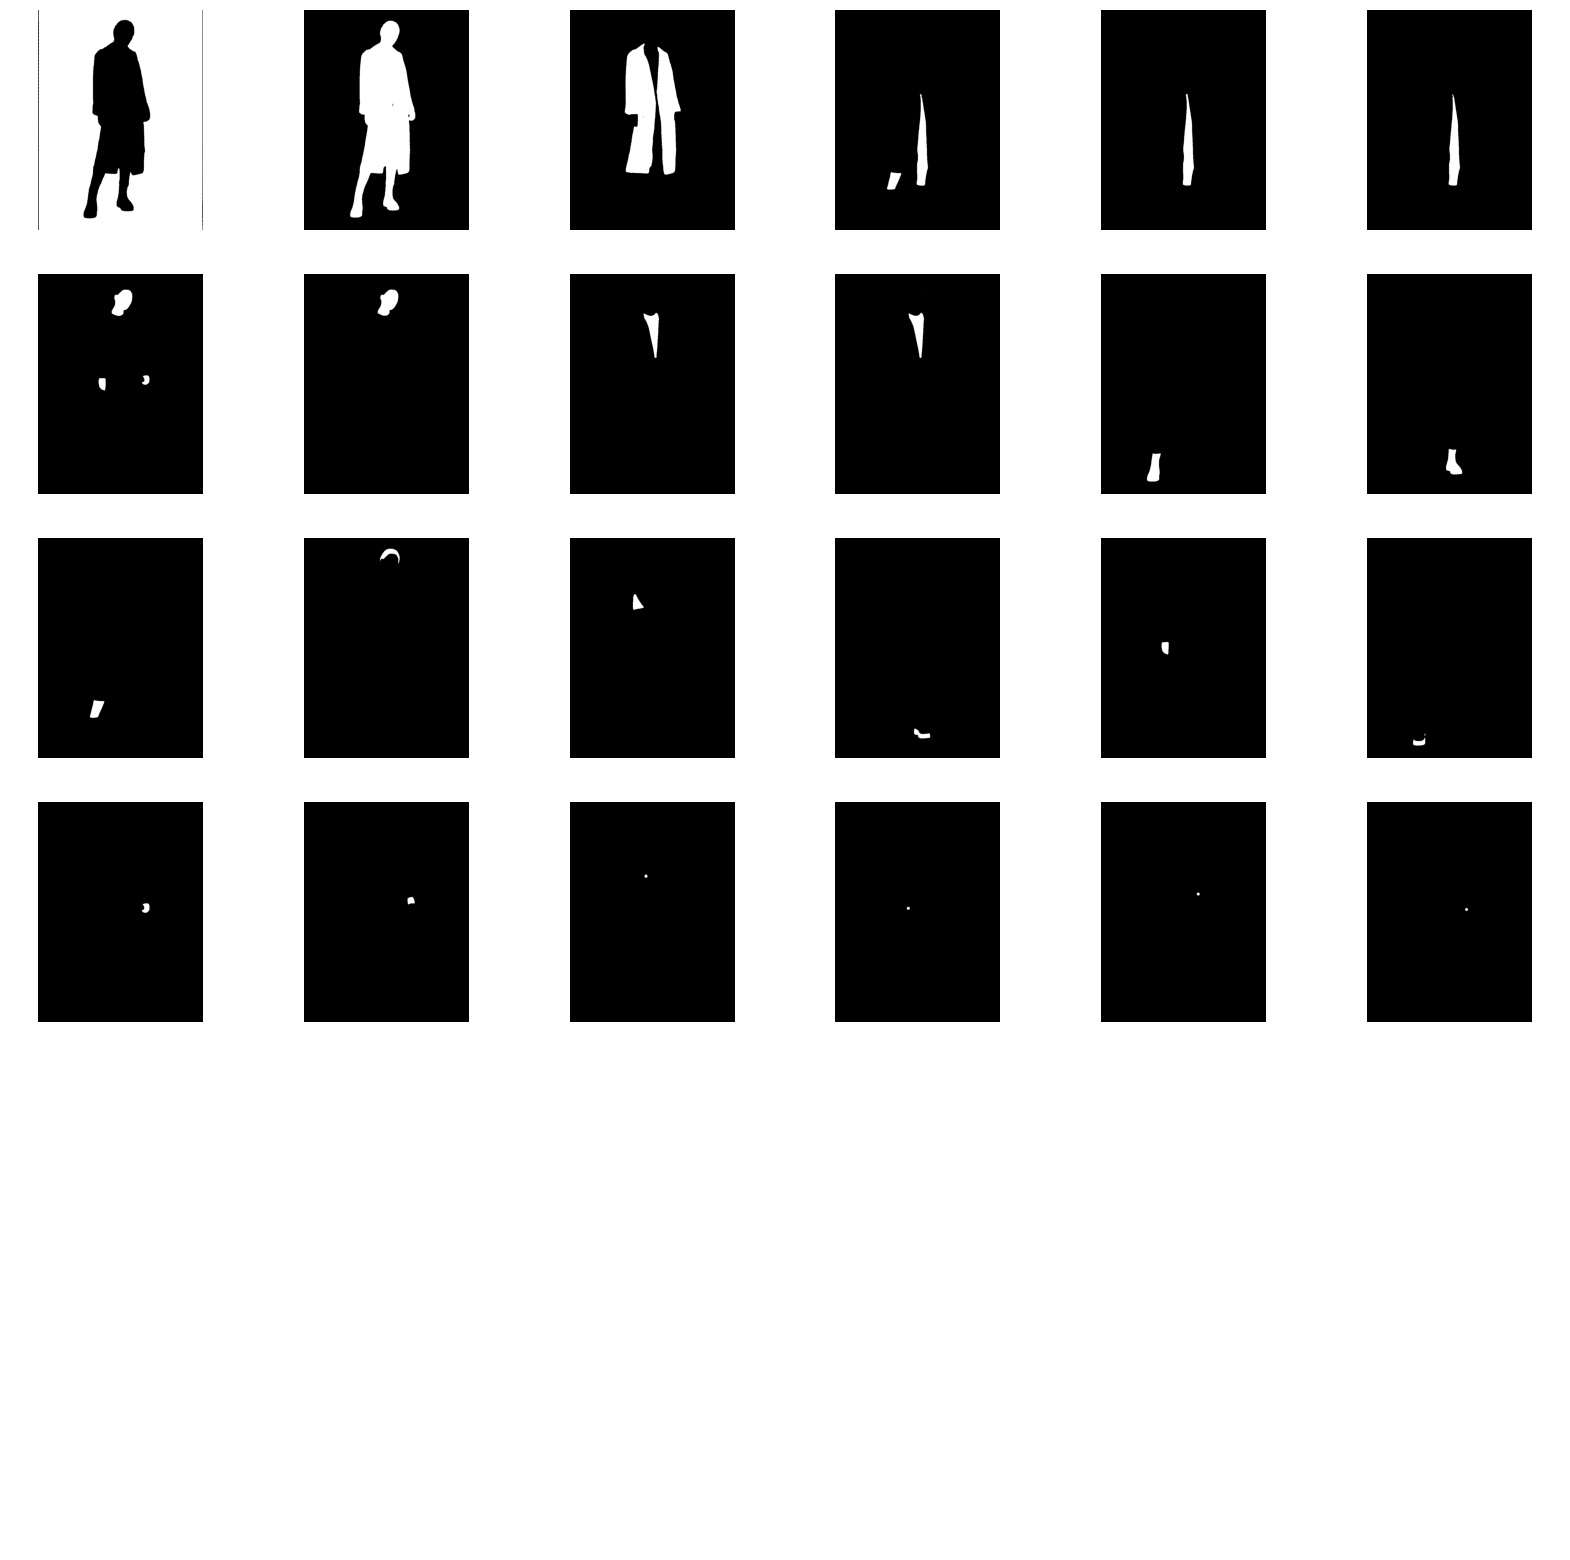

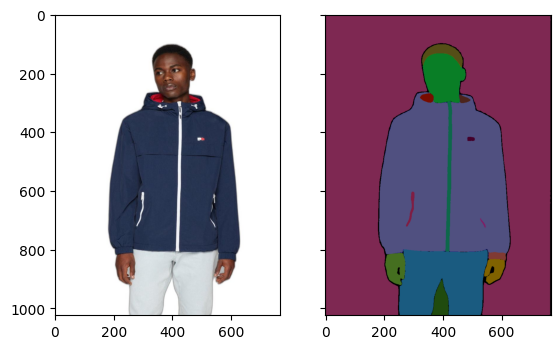

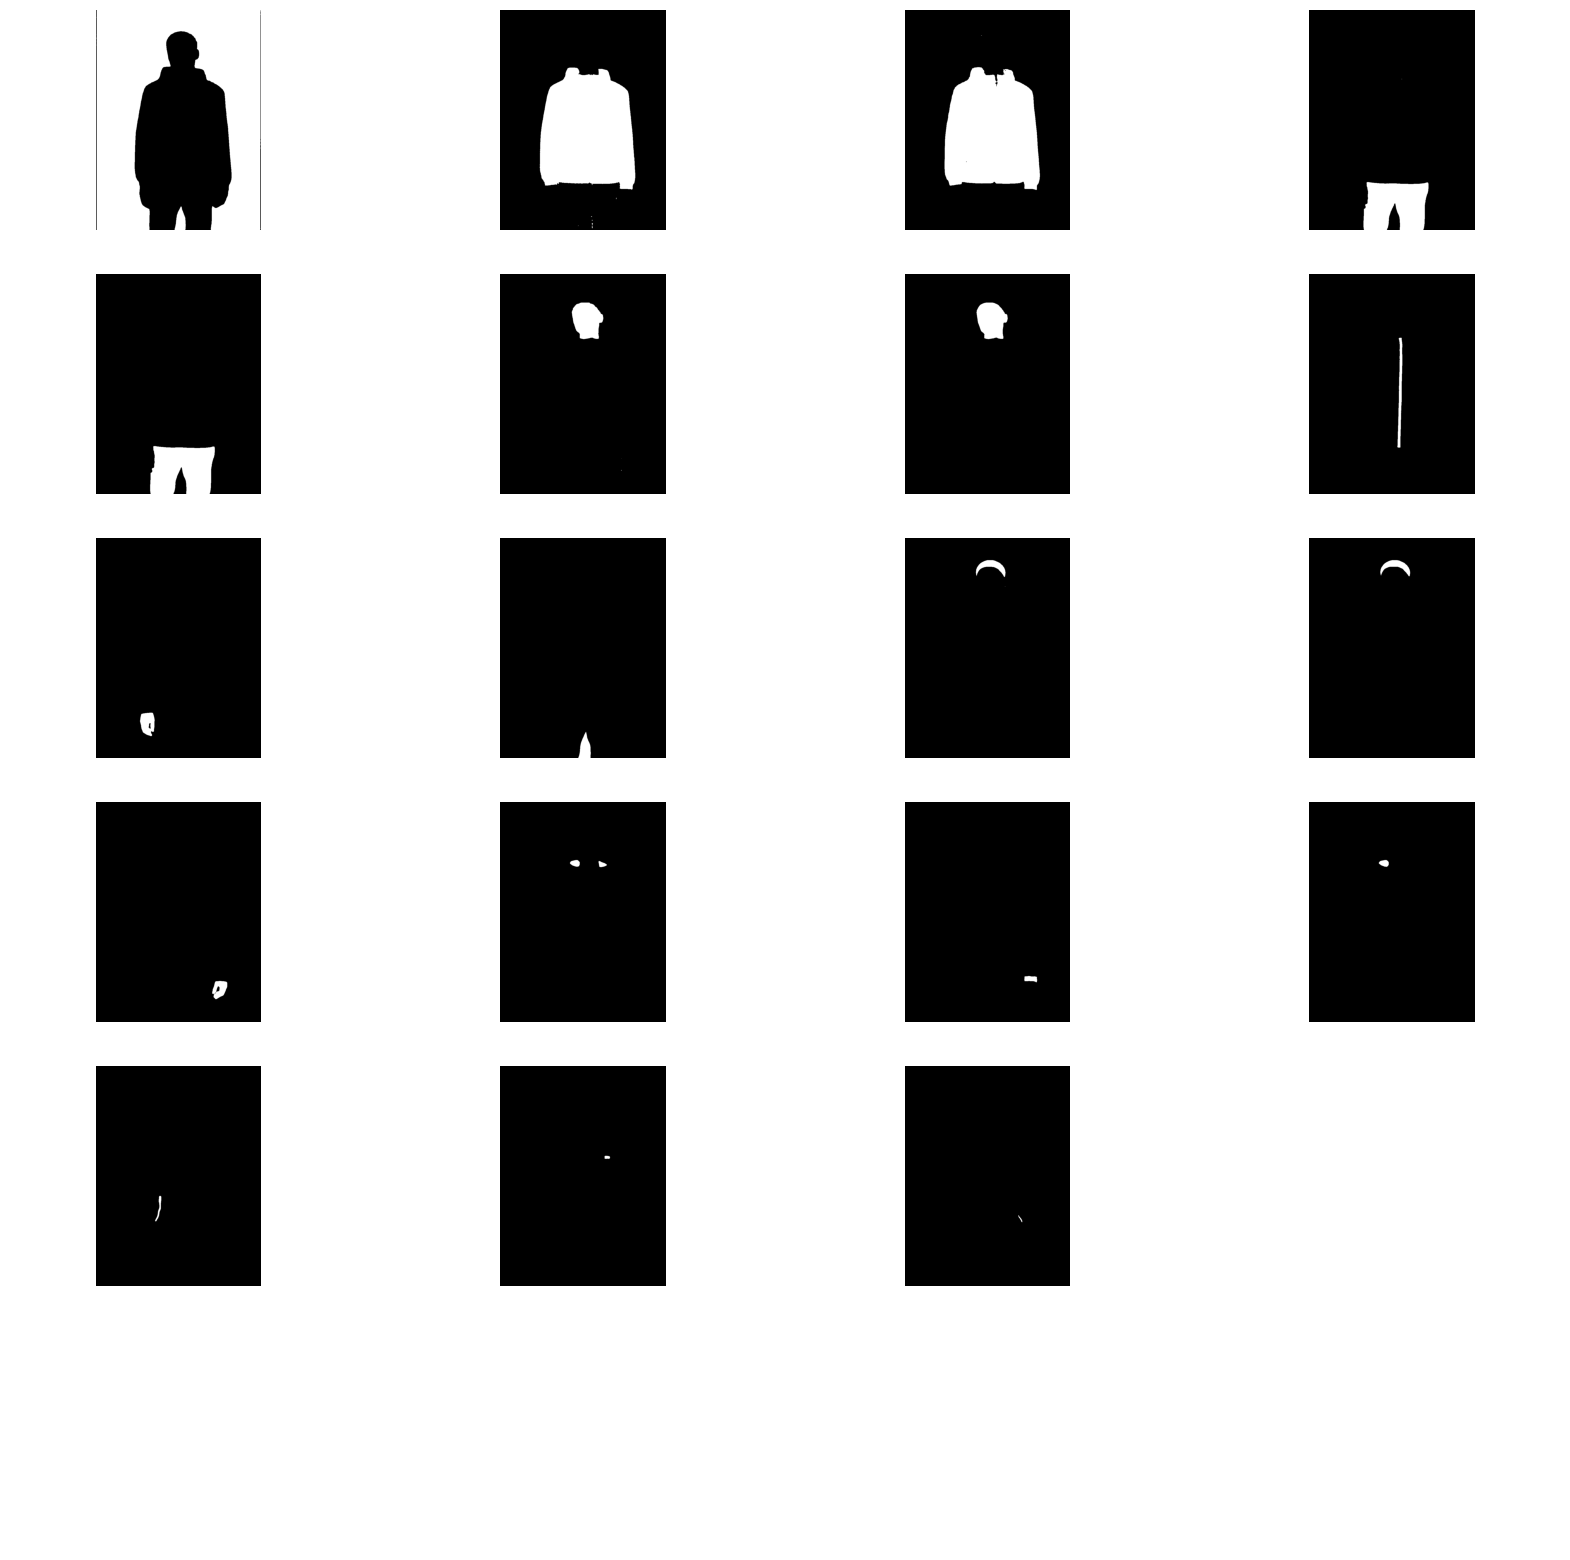

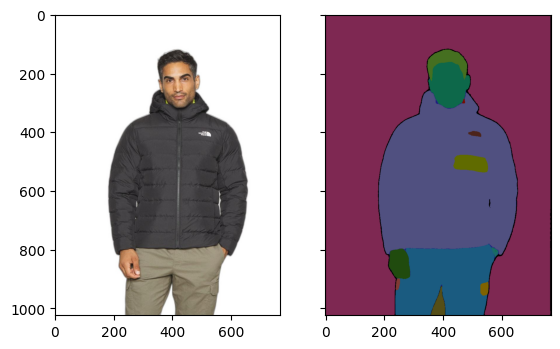

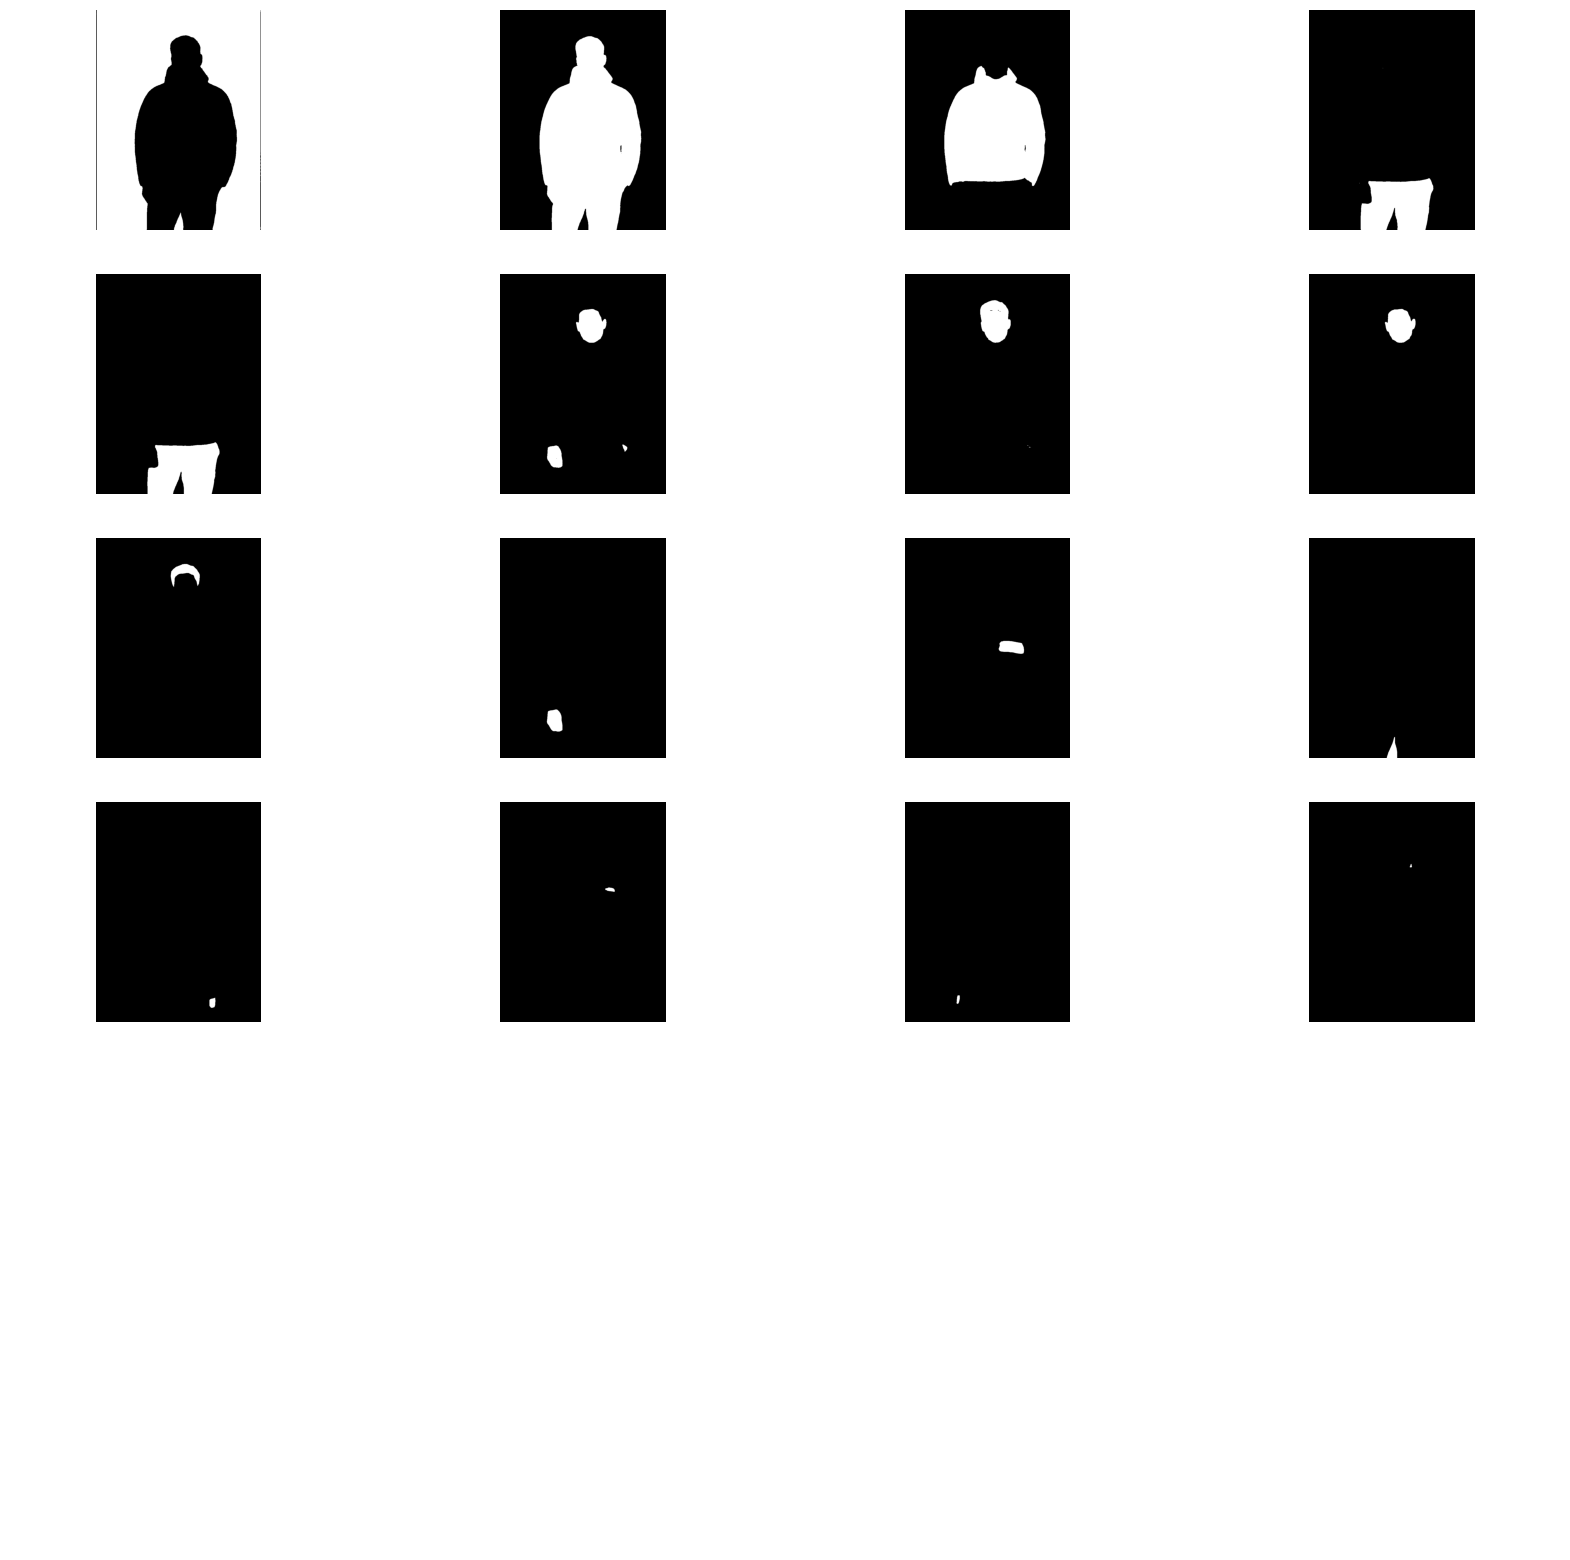

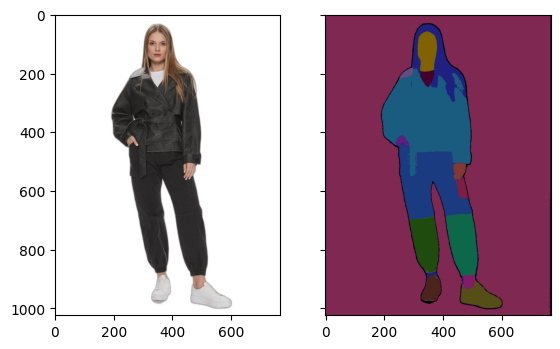

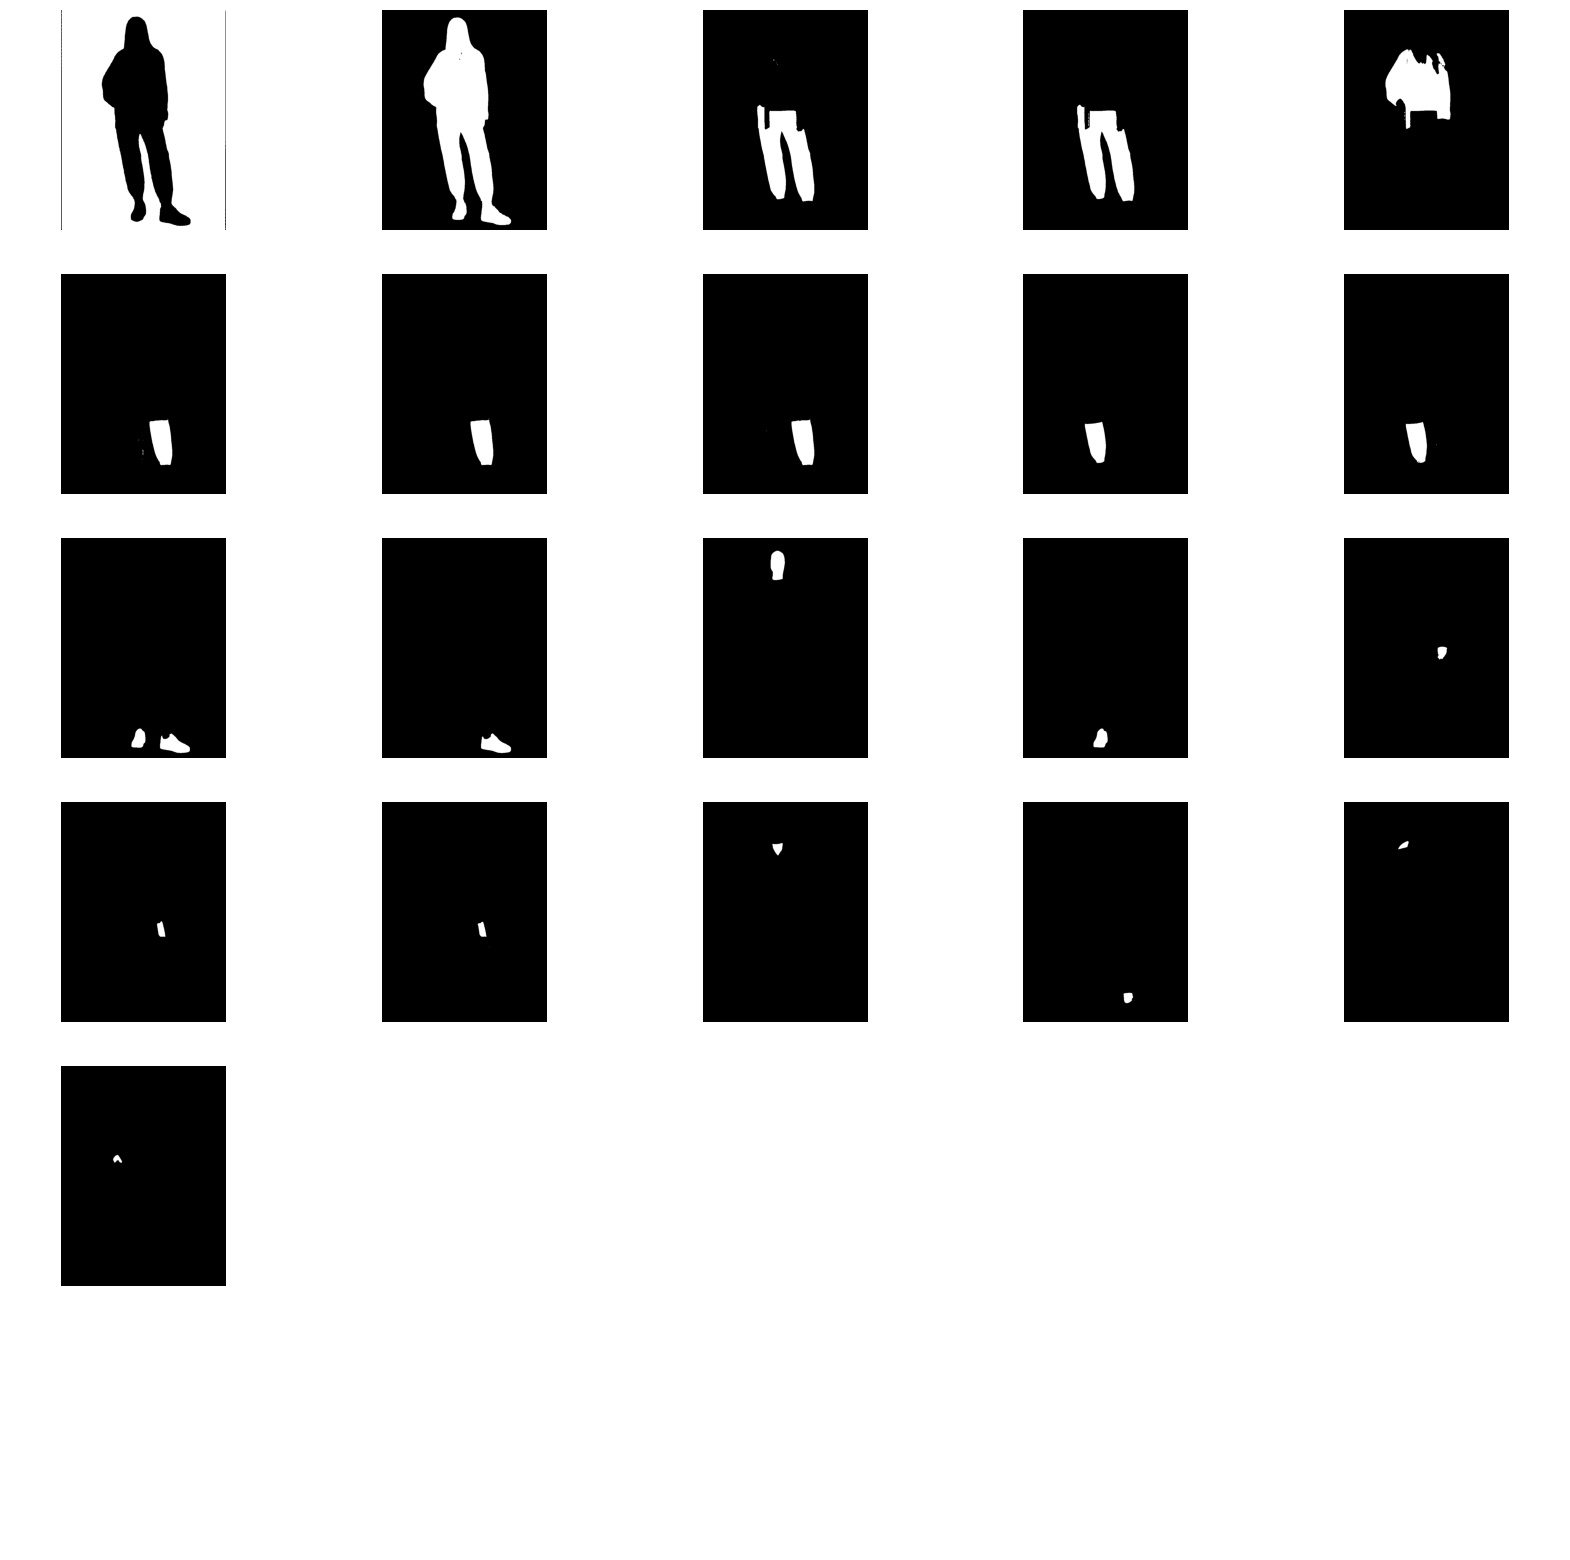

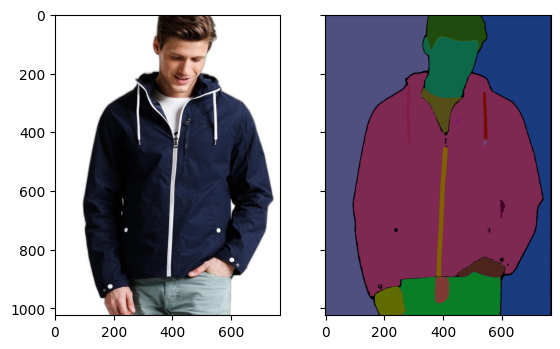

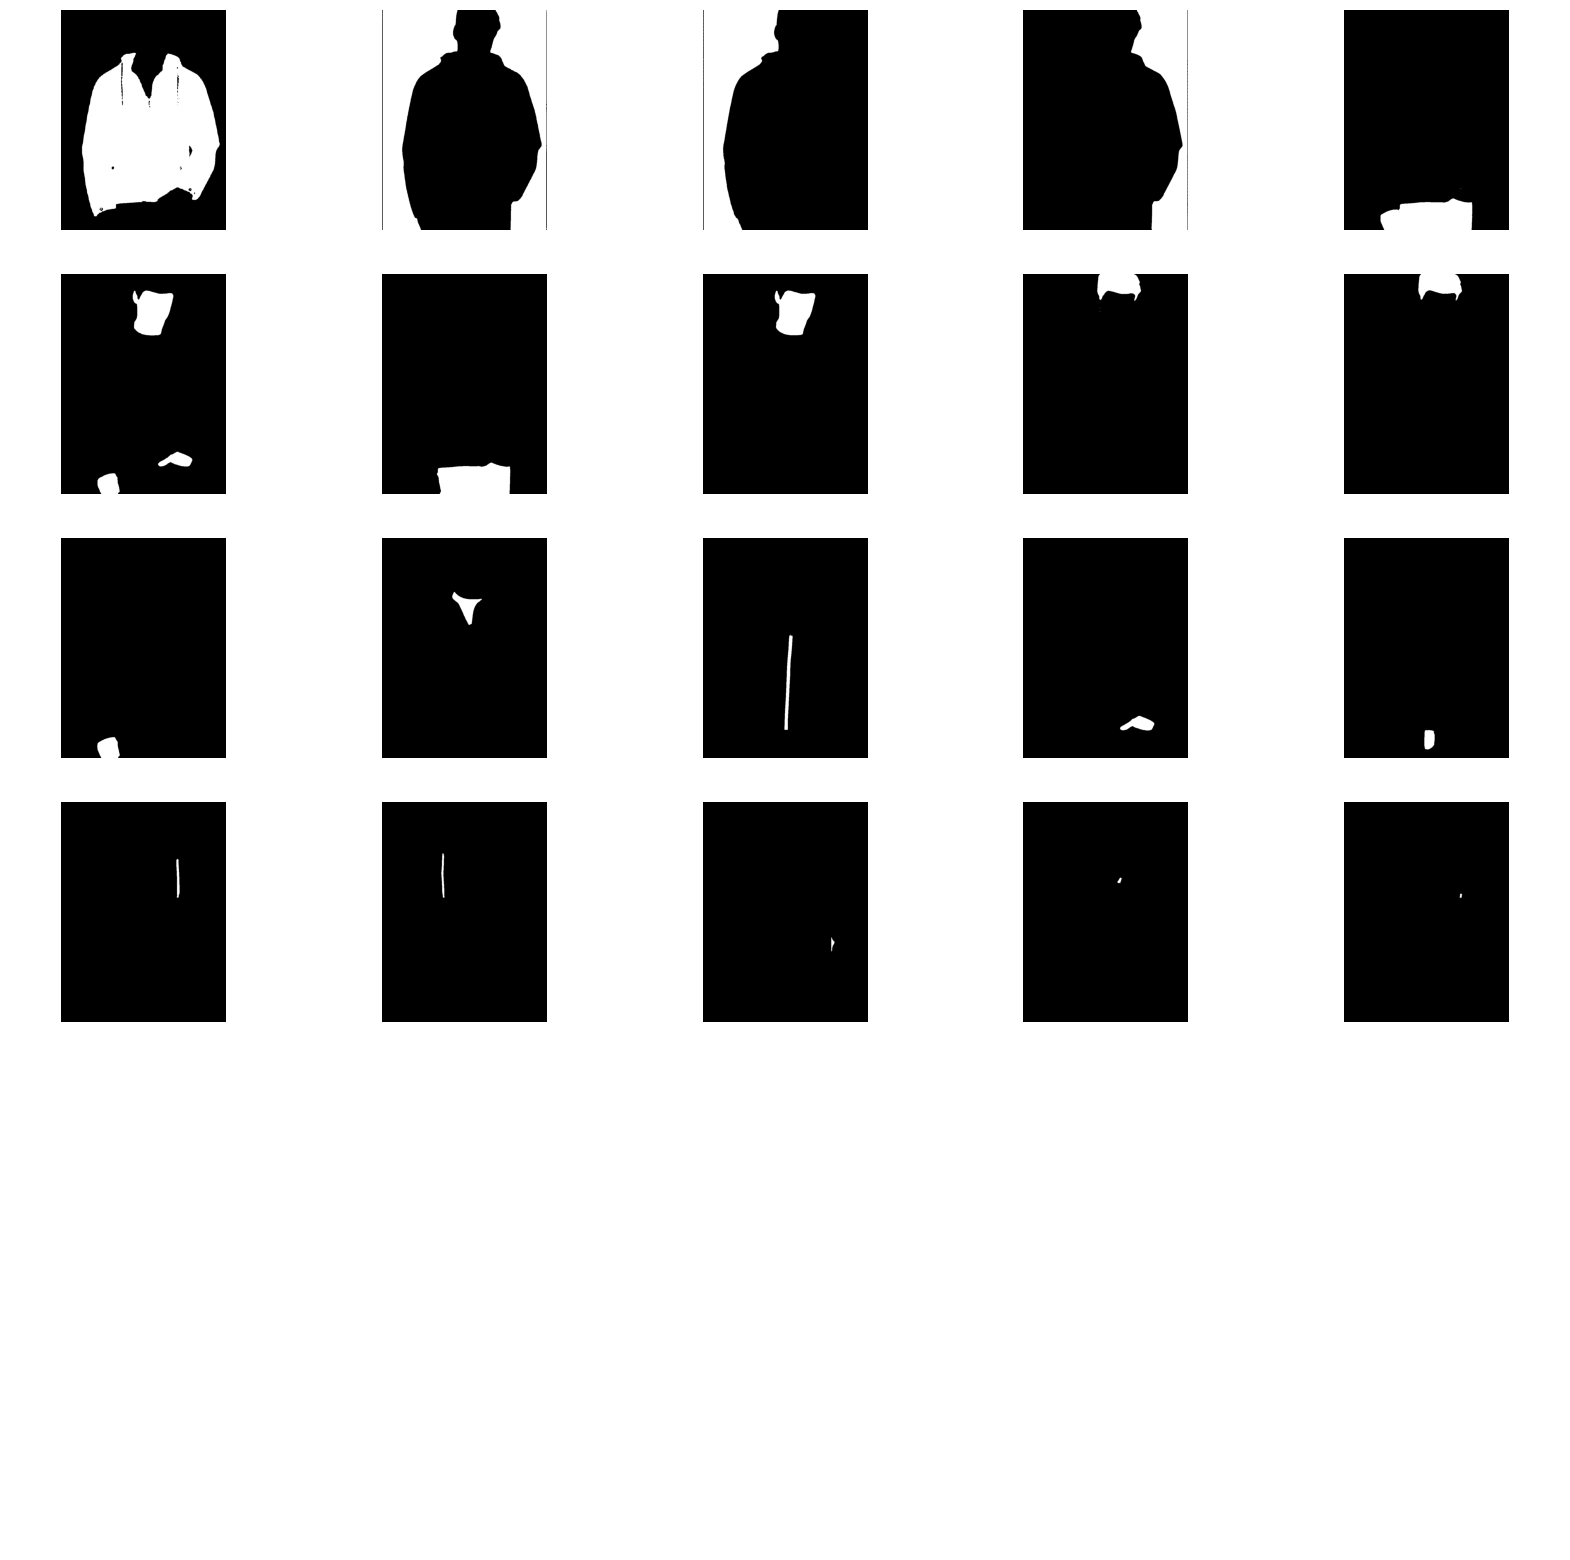

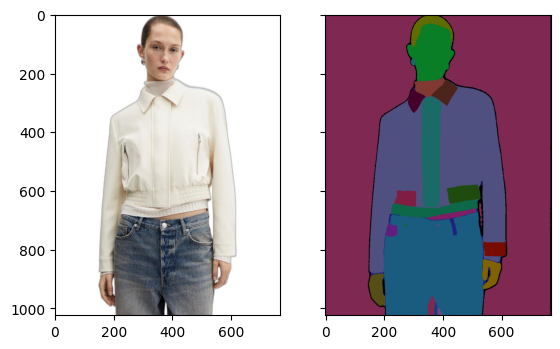

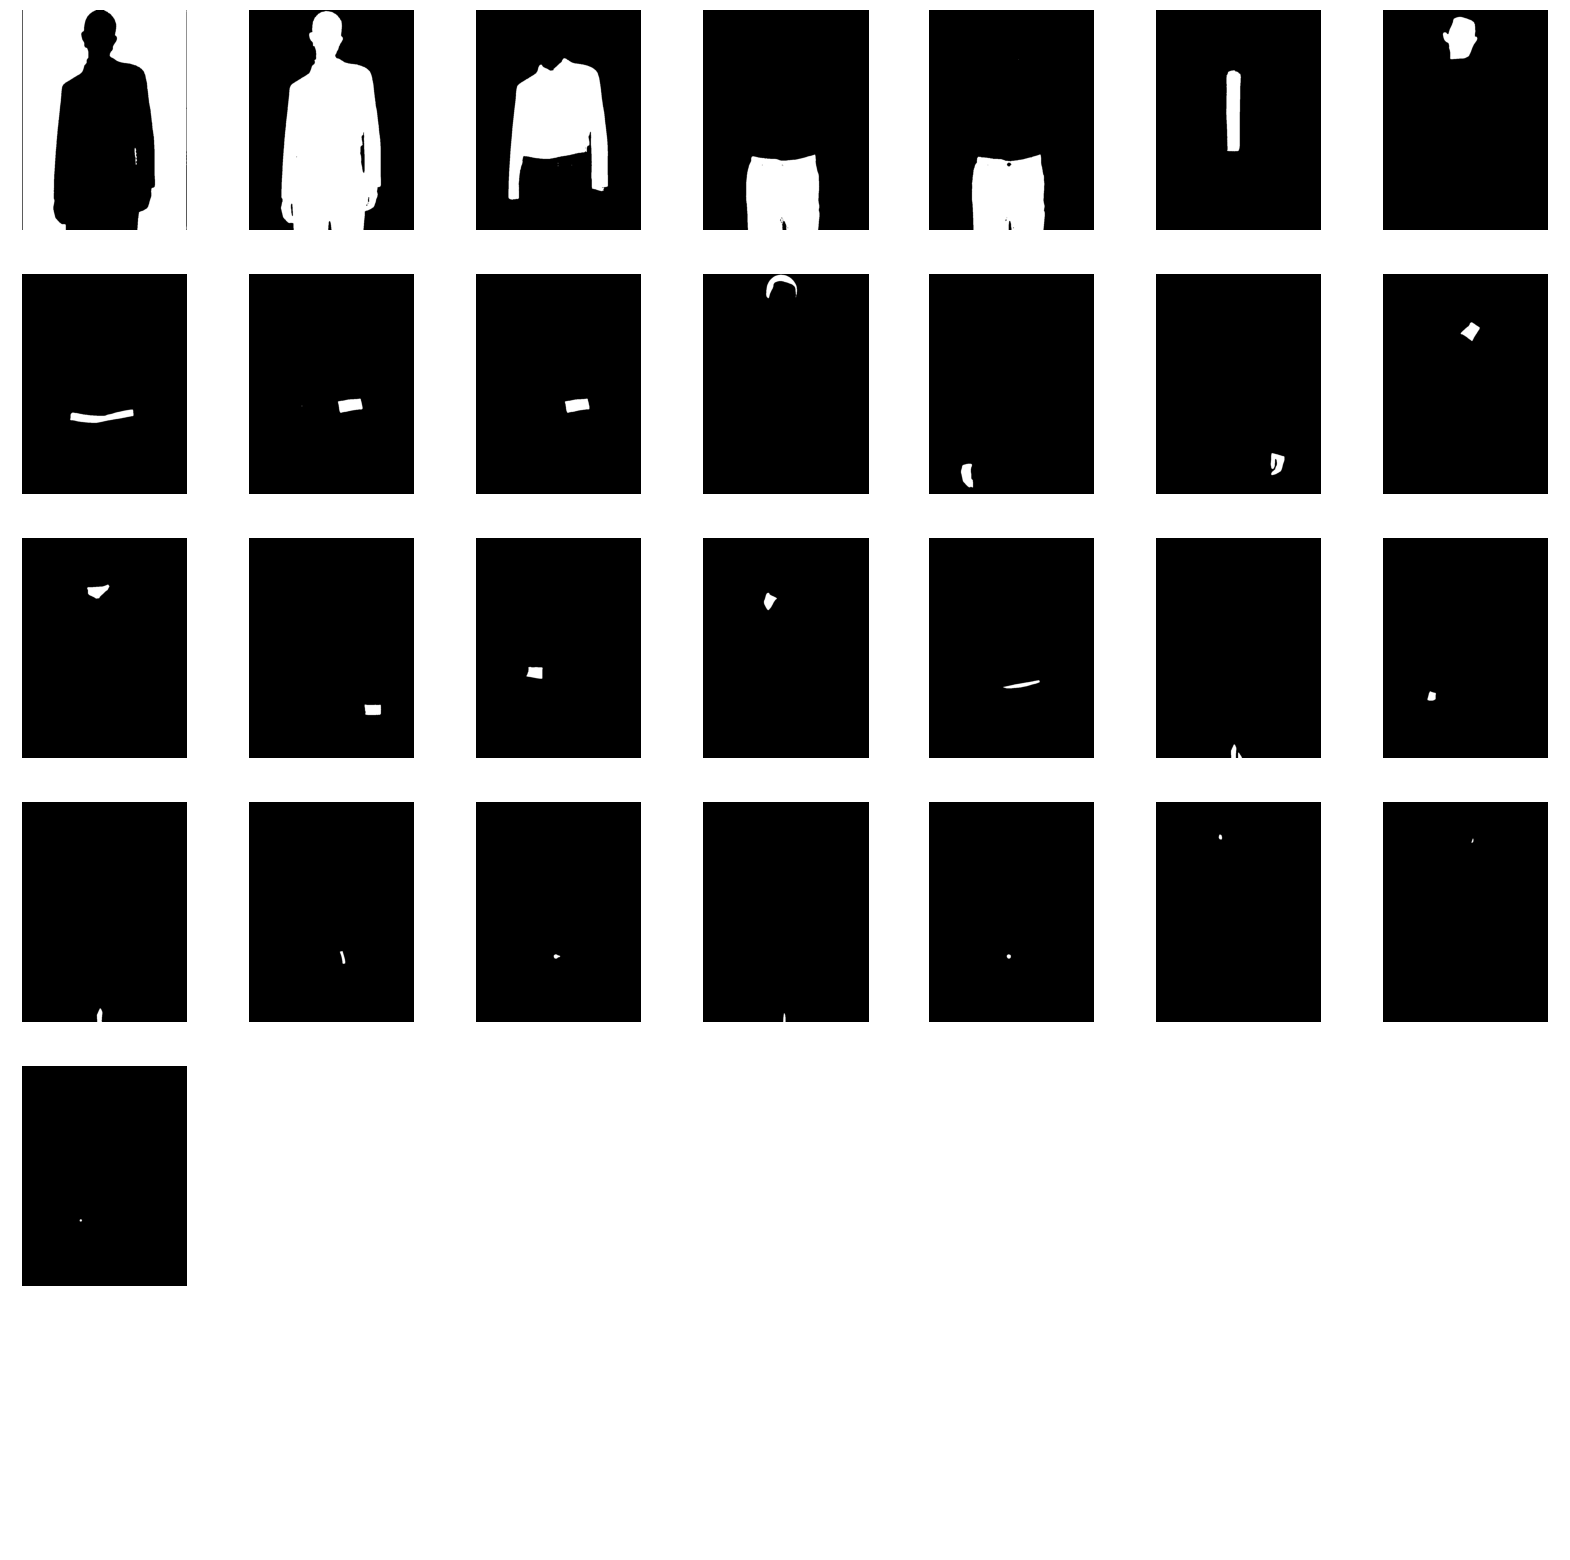

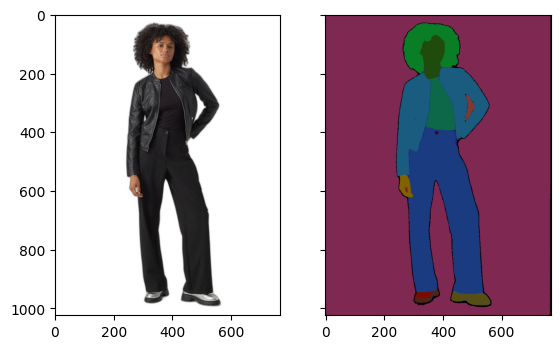

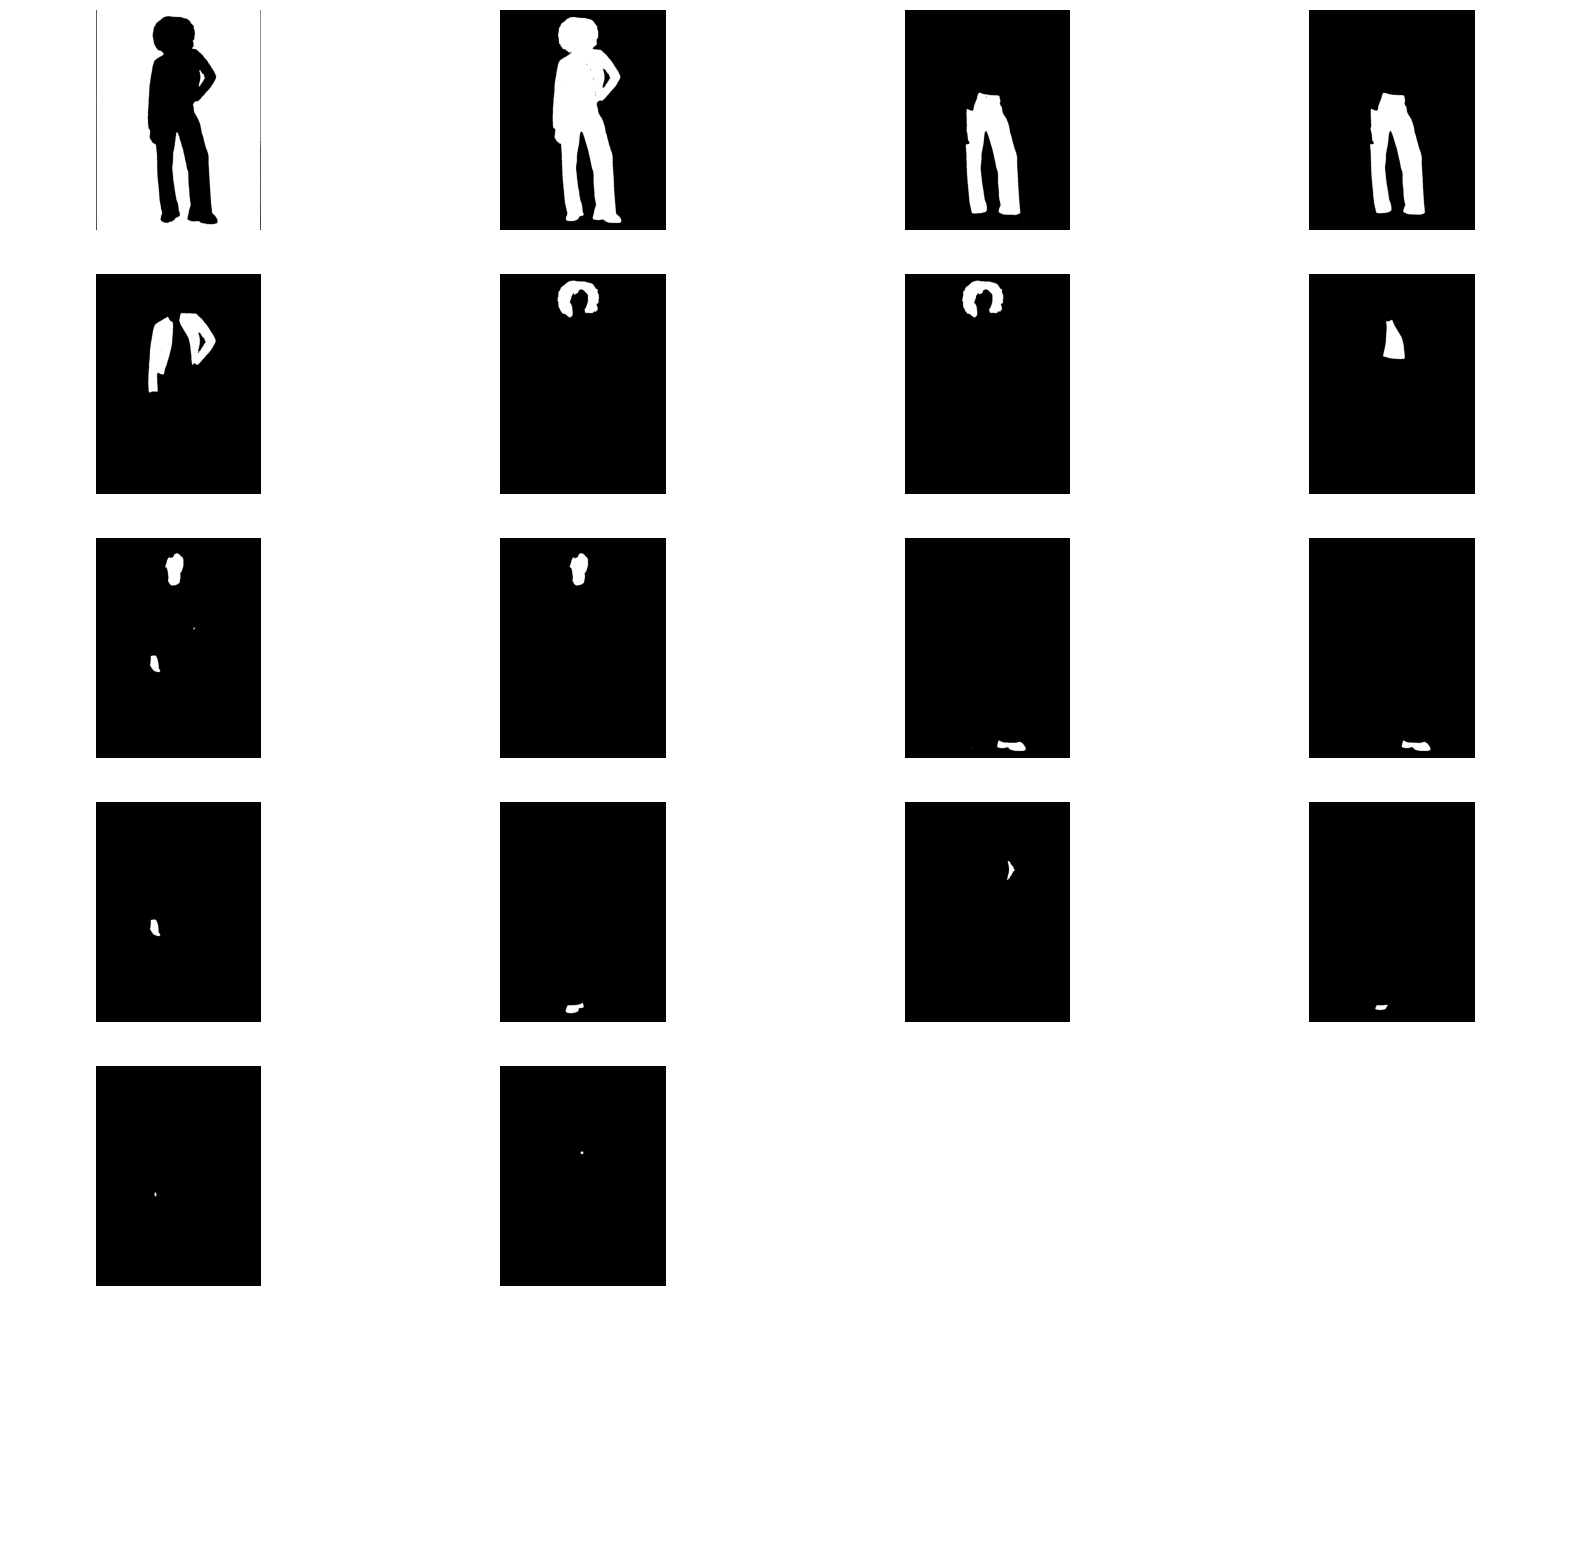

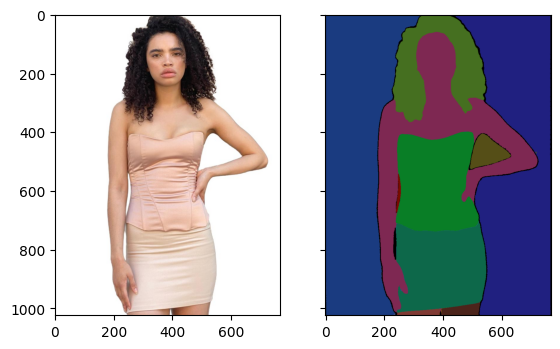

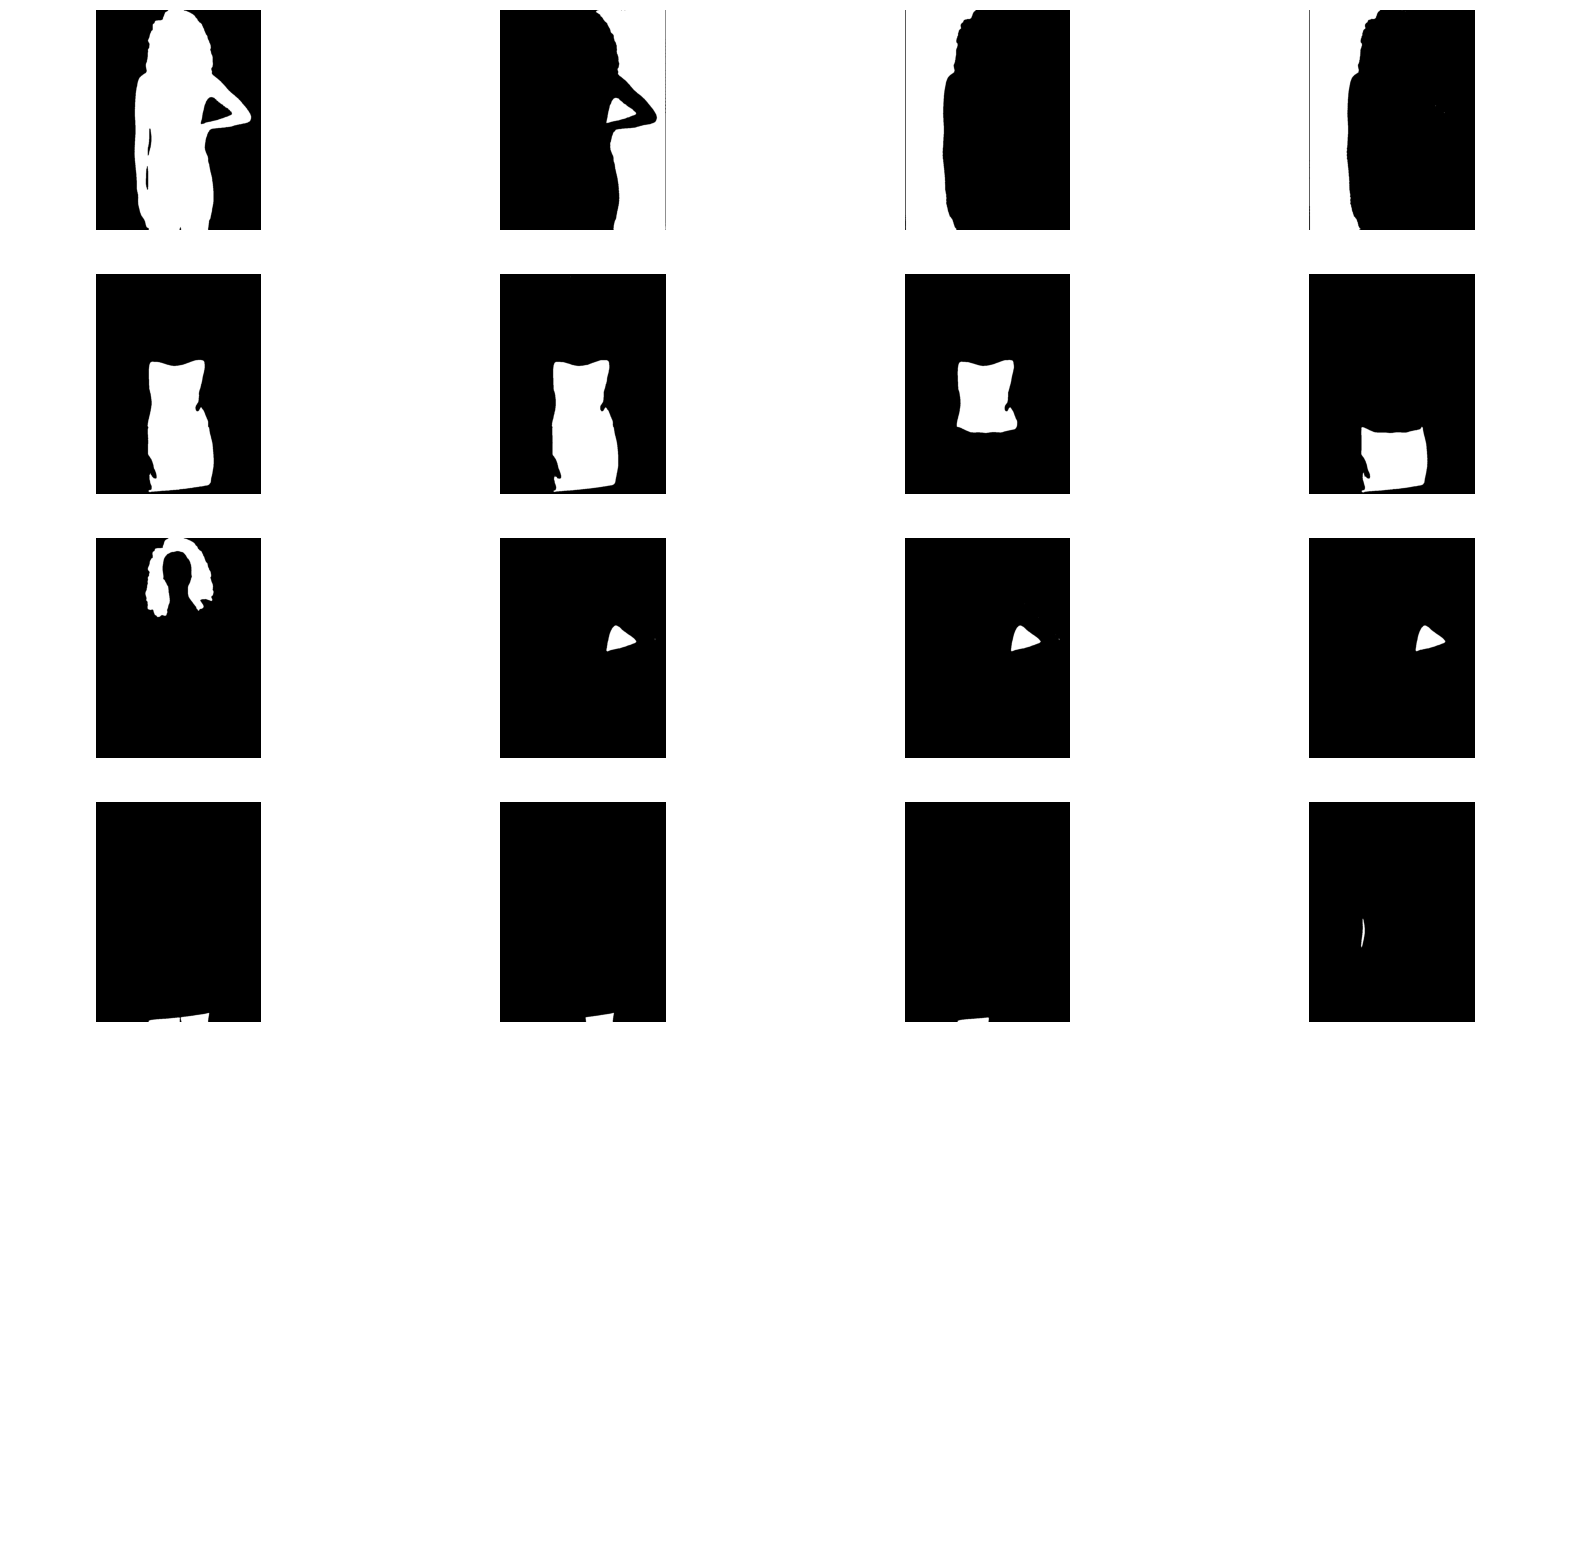

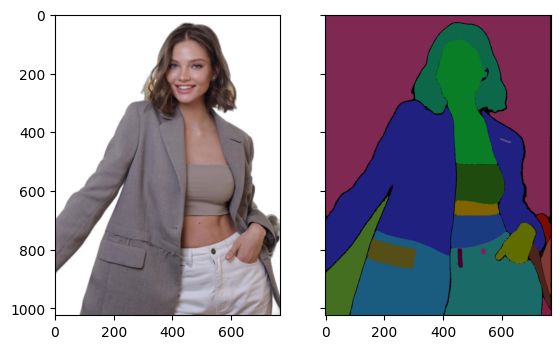

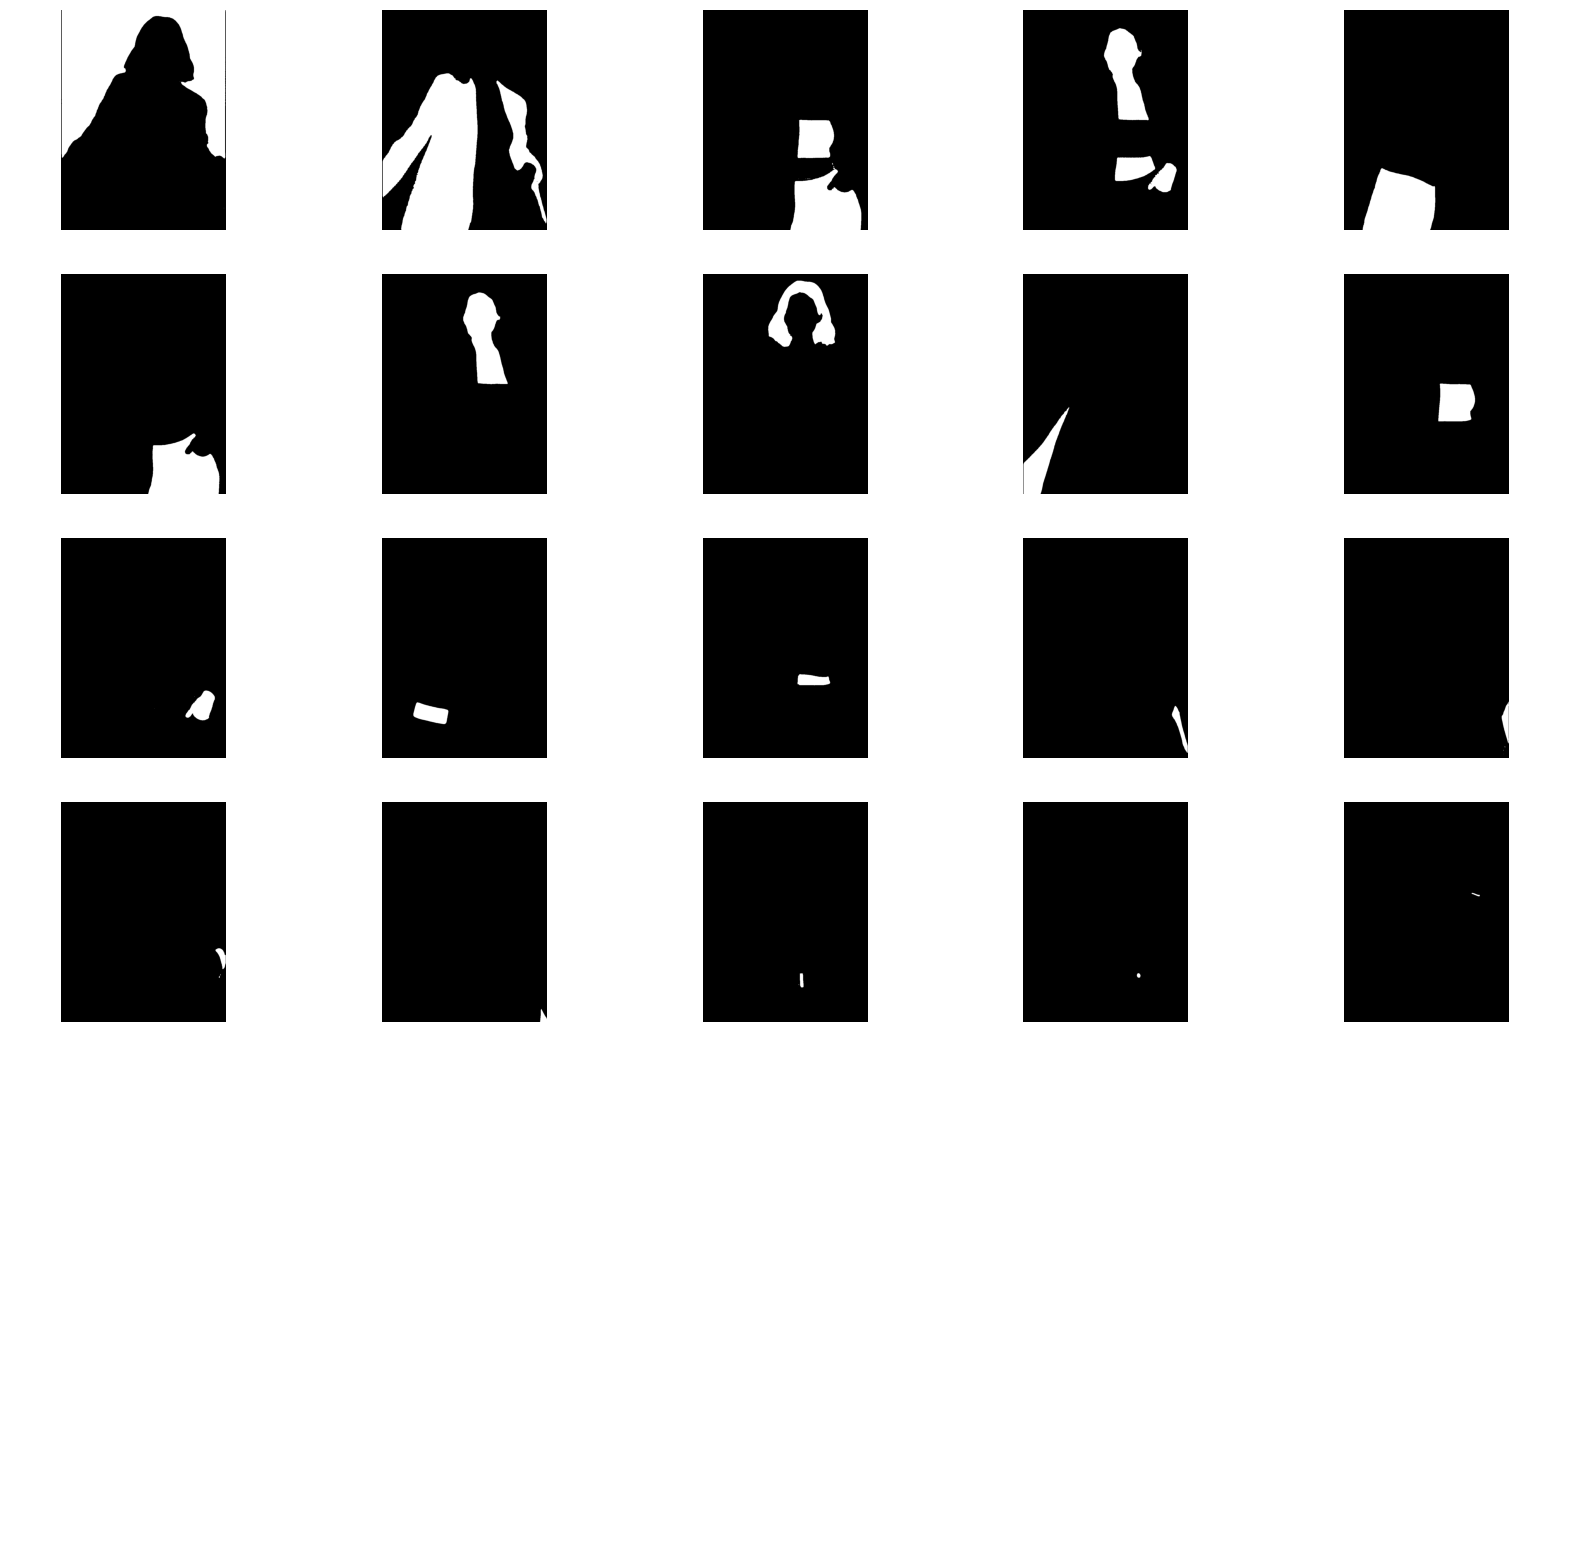

In [149]:
import os
folder_dir = "/additional_drive1/Muhammad_Umer_Mansoor/CIHP_PGN/datasets/images_done/"
annotated_dir = "/additional_drive1/Muhammad_Umer_Mansoor/CIHP_PGN/datasets/meta_sam/"
images_list = os.listdir(folder_dir)
images_list = sorted([img for img in images_list if img.split(".")[1] in ['jpg','png']])

for pic in images_list:
    img = Image.open(os.path.join(folder_dir, pic))
    img = remove(img)
    size = img.size
    result = Image.new("RGB", size, 'white')
    result.paste(img, mask=img)
    result.save("temp.jpg")
    image = cv2.imread('temp.jpg')
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    masks = mask_generator.generate(image_rgb)
    
    # Drawing Segmentation On Plot
    mask_annotator = sv.MaskAnnotator(color_lookup = sv.ColorLookup.INDEX)
    detections = sv.Detections.from_sam(masks)
    black_image = np.zeros((1024, 768, 3), dtype=np.uint8)
    annotated_image = mask_annotator.annotate(black_image, detections)
    plt.subplots(1,2, sharey=True)
    plt.subplot(121)
    plt.imshow(image_rgb)
    plt.subplot(122)
    plt.imshow(annotated_image)
    plt.imsave(os.path.join(annotated_dir, pic), annotated_image)
    plt.show()
    
    masks_ = [mask['segmentation'] for mask in sorted(masks, key=lambda x: x['area'], reverse=True)]

    sv.plot_images_grid(
        images=masks_,
        grid_size=(6, int(len(masks) / 4)),
        size=(20, 20))

In [116]:
!zip -r sleeveless.zip "/additional_drive1/Muhammad_Umer_Mansoor/CIHP_PGN/datasets/sleeveless"

  adding: additional_drive1/Muhammad_Umer_Mansoor/CIHP_PGN/datasets/sleeveless/ (stored 0%)
  adding: additional_drive1/Muhammad_Umer_Mansoor/CIHP_PGN/datasets/sleeveless/cihp_edge_maps/ (stored 0%)
  adding: additional_drive1/Muhammad_Umer_Mansoor/CIHP_PGN/datasets/sleeveless/cihp_edge_maps/284.png (deflated 3%)
  adding: additional_drive1/Muhammad_Umer_Mansoor/CIHP_PGN/datasets/sleeveless/cihp_edge_maps/26.png (deflated 2%)
  adding: additional_drive1/Muhammad_Umer_Mansoor/CIHP_PGN/datasets/sleeveless/cihp_edge_maps/30.png (deflated 3%)
  adding: additional_drive1/Muhammad_Umer_Mansoor/CIHP_PGN/datasets/sleeveless/cihp_edge_maps/237.png (deflated 3%)
  adding: additional_drive1/Muhammad_Umer_Mansoor/CIHP_PGN/datasets/sleeveless/cihp_edge_maps/114.png (deflated 2%)
  adding: additional_drive1/Muhammad_Umer_Mansoor/CIHP_PGN/datasets/sleeveless/cihp_edge_maps/18.png (deflated 3%)
  adding: additional_drive1/Muhammad_Umer_Mansoor/CIHP_PGN/datasets/sleeveless/cihp_edge_maps/131.png (defla